In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /')

#Parse XML

In [ ]:
import xml.etree.ElementTree as ET
import re
import pandas as pd


In [ ]:
relevant_doc_file_path_old = '/content/drive/My Drive/COLIEE Retrieval /COLIEE2019-StatuteLaw-English Training Data/'

In [ ]:
relevant_doc_file_path = '/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /COLIEE2020statute_data-English/train/'

In [ ]:
def parse_xml(file_path):    
    pattern = re.compile('\\nArticle\s\d*\-?\d?\d?\d?') 

    PairID_arr= []
    text1_arr = []
    text2_arr = []
    label_arr = []
    article_numbers = []
    count = 0
    sum = 0
    for files in os.listdir(file_path):
        try: 

            if files.endswith('.xml'):
                print(files)
                count += 1
                xmlp = ET.XMLParser(encoding="utf-8")
                tree = ET.parse(file_path+files, parser = xmlp)
                root = tree.getroot()
                count_list = []
                for pair in root.findall('pair'):
                    
                    PairID = pair.get('id')
                    count_list.append(PairID)
                    PairID_arr.append(PairID)
                    
                    text1 = pair.find('t1').text
                    text1_arr.append(str(text1))

                    numbers = re.findall(pattern,text1)
                    article_numbers.append(numbers)
                    
                    text2 = pair.find('t2').text
                    text2_arr.append(str(text2))

                    Label = pair.get('label')
                    label_arr.append(Label)
                sum += len(count_list)
                print(len(count_list))
                print(count_list)
        except Exception as e: 
            print(e , files)
    print(count)
    print(sum)
    return PairID_arr, text1_arr , article_numbers , text2_arr , label_arr

In [ ]:
PairID_arr, text1_arr , article_numbers , text2_arr , label_arr = parse_xml(relevant_doc_file_path)

riteval_H18_en.xml
36
['H18-1-1', 'H18-1-2', 'H18-1-3', 'H18-2-1', 'H18-2-2', 'H18-2-3', 'H18-2-4', 'H18-2-5', 'H18-3-2', 'H18-3-4', 'H18-9-1', 'H18-9-2', 'H18-9-3', 'H18-15-1', 'H18-15-2', 'H18-15-3', 'H18-15-4', 'H18-15-5', 'H18-20-1', 'H18-20-2', 'H18-20-3', 'H18-21-2', 'H18-21-3', 'H18-23-I', 'H18-23-U', 'H18-25-E', 'H18-26-1', 'H18-26-5', 'H18-27-U', 'H18-28-1', 'H18-28-2', 'H18-28-3', 'H18-28-4', 'H18-29-4', 'H18-29-5', 'H18-32-5']
riteval_H20_en.xml
41
['H20-2-A', 'H20-2-O', 'H20-3-2', 'H20-3-3', 'H20-3-5', 'H20-6-2', 'H20-6-5', 'H20-12-1', 'H20-12-2', 'H20-12-4', 'H20-12-5', 'H20-15-A', 'H20-15-I', 'H20-18-A', 'H20-18-U', 'H20-18-E', 'H20-18-O', 'H20-19-A', 'H20-19-I', 'H20-19-U', 'H20-19-E', 'H20-19-O', 'H20-22-1', 'H20-23-5', 'H20-24-5', 'H20-26-1', 'H20-26-2', 'H20-26-3', 'H20-26-5', 'H20-27-A', 'H20-27-I', 'H20-27-U', 'H20-27-E', 'H20-27-O', 'H20-28-A', 'H20-28-I', 'H20-28-U', 'H20-28-E', 'H20-28-O', 'H20-30-I', 'H20-30-O']
riteval_H19_en.xml
37
['H19-1-3', 'H19-4-I', 'H19-

In [ ]:
def create_dataframe(PairID_arr, text1_arr , article_numbers , text2_arr):    
    dict_relevant = {'ID' : PairID_arr , 'Query' : text2_arr , 'Article_numbers' : article_numbers , 'Articles' : text1_arr }
    df_relevant = pd.DataFrame(dict_relevant)
    return df_relevant


In [ ]:
df_relevant = create_dataframe(PairID_arr, text1_arr , article_numbers , text2_arr)
df_relevant.head()

ID  ...                                           Articles
0  H18-1-1  ...  \nArticle 572\nEven if the seller makes a spec...
1  H18-1-2  ...  \nArticle 565\nThe provisions of the preceding...
2  H18-1-3  ...  \nArticle 568\n(1) The successful bidder at an...
3  H18-2-1  ...  \nArticle 697\n(1) A person that has begun to ...
4  H18-2-2  ...  \nArticle 698\nIf a manager engages in benevol...

[5 rows x 4 columns]

In [ ]:
df_relevant_id_index = df_relevant.copy()
df_relevant_id_index.set_index('ID',inplace=True)

In [ ]:
df_relevant.head()

ID  ...                                           Articles
0  H18-1-1  ...  \nArticle 572\nEven if the seller makes a spec...
1  H18-1-2  ...  \nArticle 565\nThe provisions of the preceding...
2  H18-1-3  ...  \nArticle 568\n(1) The successful bidder at an...
3  H18-2-1  ...  \nArticle 697\n(1) A person that has begun to ...
4  H18-2-2  ...  \nArticle 698\nIf a manager engages in benevol...

[5 rows x 4 columns]

In [ ]:
df_relevant_id_index.head()

Query  ...                                           Articles
ID                                                          ...                                                   
H18-1-1  \nA special provision that releases warranty c...  ...  \nArticle 572\nEven if the seller makes a spec...
H18-1-2  \nThere is a limitation period on pursuance of...  ...  \nArticle 565\nThe provisions of the preceding...
H18-1-3  \nA compulsory auction is also a sale, so warr...  ...  \nArticle 568\n(1) The successful bidder at an...
H18-2-1  \nIn cases where a person plans to prevent cri...  ...  \nArticle 697\n(1) A person that has begun to ...
H18-2-2  \nIn cases where an individual rescues another...  ...  \nArticle 698\nIf a manager engages in benevol...

[5 rows x 3 columns]

In [ ]:
print(df_relevant_id_index.loc['H27-35-O',"Articles"])


Article 987
A person with a duty of testamentary gift (in this Section, a person who bears a duty to perform a testamentary gift) or any other interested party may give notice to a testamentary donee to the effect that acceptance or renunciation of a testamentary gift should be made within a specified period, fixing a period that is reasonable. In this case, if a donee does not indicate his/her intention to a person with a duty of testamentary gift within that period, the testamentary gift shall be deemed to have been accepted..



#Analysis on the Pairs

In [ ]:
from collections import Counter 
from nltk.tokenize import wordpunct_tokenize , word_tokenize
import pprint
import pickle


In [ ]:
def find_character_length(df_relevant):
    '''
    This function is to find the length of the sequences in queries and articles.
    '''
    queries = df_relevant['Query']
    articles = df_relevant['Articles']
    pair_id = df_relevant['ID']

    query_length = []
    articles_length = []

    for i in range(len(queries)):
        query_length.append(len(queries[i]))
        articles_length.append(len(articles[i]))

    article_length_dict = dict(zip(pair_id,articles_length))
    query_length_dict = dict(zip(pair_id,query_length))

    return article_length_dict, query_length_dict, query_length, articles_length


In [ ]:
def find_number_relevant_articles(df_relevant):
    '''
    This function is to find the number of relevant articles for a given query. 
    '''
    pair_id = df_relevant['ID']
    relevant_articles = df_relevant['Article_numbers']
    pair_id_list = []
    relevant_articles_list = []
    number_relevant_articles_list = []

    for i in range(len(pair_id)):
        pair_id_list.append(pair_id[i])
        relevant_articles_list.append(relevant_articles[i])
    
    for i in range(len(relevant_articles_list)):
        number_relevant_articles_list.append(len(relevant_articles_list[i]))
    

    number_relevant_articles_dict = dict(zip(pair_id_list,number_relevant_articles_list))
    relevant_articles_dict = dict(zip(pair_id_list,relevant_articles_list))
    
    return number_relevant_articles_dict,relevant_articles_dict ,pair_id_list,relevant_articles_list

In [ ]:
def query_vocabulary(df_relevant):
    '''
    This function is used to create the vocabulary for the queries. 
    '''

    queries = df_relevant['Query']
    pair_id = df_relevant['ID']

    query_dict = dict(zip(df_relevant['ID'],df_relevant['Query']))

    query_tokens=[]

    for keys,values in query_dict.items():
        query_tokens.append(wordpunct_tokenize(values))

    query_tokens_dict = dict(zip(df_relevant['ID'],query_tokens))

    query_tokens_length = []
    query_all_tokens = []

    for keys,values in query_tokens_dict.items():
        query_tokens_length.append(len(values))
        for token in values: 
            query_all_tokens.append(token)

    
    query_tokens_length_dict = dict(zip(df_relevant['ID'],query_tokens_length))
    query_unique_tokens = set(query_all_tokens)
    query_unique_tokens_size = len(query_unique_tokens)

    return query_dict , query_tokens_dict , query_tokens_length_dict , query_unique_tokens, query_unique_tokens_size


In [ ]:
#df_relevant['ID'],df_relevant['Articles']
def articles_vocabulary(id,articles):
    '''
    This function is used to create the vocabulary for the articles. 
    '''

    # articles = df_relevant['Articles']
    # pair_id = df_relevant['ID']

    articles_dict = dict(zip(id,articles))

    articles_tokens=[]

    for keys,values in articles_dict.items():
        articles_tokens.append(wordpunct_tokenize(values.lower()))

    articles_tokens_dict = dict(zip(id,articles_tokens))

    articles_tokens_length = []
    articles_all_tokens = []

    for keys,values in articles_tokens_dict.items():
        articles_tokens_length.append(len(values))
        for token in values: 
            articles_all_tokens.append(token)
    
    articles_tokens_length_dict = dict(zip(id,articles_tokens_length))
    articles_unique_tokens = set(articles_all_tokens)
    articles_unique_tokens_size = len(articles_unique_tokens)
    return articles_dict , articles_tokens_dict ,articles_tokens_length_dict, articles_unique_tokens , articles_unique_tokens_size


In [ ]:
def similar_word_vocabulary(articles_unique_tokens,query_unique_tokens):
    similar_word_vocab = articles_unique_tokens.intersection(query_unique_tokens)

    return similar_word_vocab , len(similar_word_vocab)

In [ ]:
def concat_unique_tokens(articles_unique_tokens,query_unique_tokens):
    all_unique_tokens = articles_unique_tokens.union(query_unique_tokens)

    return all_unique_tokens , len(all_unique_tokens)

In [ ]:
#articles referenced within articles 

def articles_ref_within_articles(id , articles ):
    '''
    This function is used to find the number of articles referenced within the articles. 
    '''

    article_pattern = re.compile(r'\sArticle\s\d\d?[^.,:\\n]?\-?\d?')

    articles_dict = dict(zip(id,articles))

    article_reference_dict = {}
    unique_article_reference_dict = {}
    for keys,values in articles_dict.items():
        numbers = re.findall(article_pattern,values[1:])
        article_numbers = []
        for number in numbers:
            if number.startswith('\n') == True:
                pass
            else: 
                article_numbers.append(number)
        keys = keys.split()
        keys = re.sub('-','_',keys[0])
        unique_article_numbers = set(article_numbers)
        unique_article_reference_dict.update({keys:unique_article_numbers})
        article_reference_dict.update({keys:article_numbers})


    return article_reference_dict , unique_article_reference_dict
    

In [ ]:
# Number of articles per query 

def articles_per_query(df_relevant):
    '''
    This function is used to determine the number of articles per query along with the average number of articles per query. 
    '''

    article_numbers_dict = dict(zip(df_relevant['ID'],df_relevant['Article_numbers']))
    articles_per_query_dict = {}
    more_articles_per_query_dict = {}
    less_articles_per_query_dict = {}
    articles = 0
    id = 0

    for keys,values in article_numbers_dict.items():
        number_articles_per_query = len(values)

        if number_articles_per_query >= 3 : 
            more_articles_per_query_dict.update({keys:number_articles_per_query})
        else: 
            less_articles_per_query_dict.update({keys:number_articles_per_query})

        articles_per_query_dict.update({keys:number_articles_per_query})

        articles += number_articles_per_query
        id += 1

    average_article_per_query = articles / id

    return articles_per_query_dict , average_article_per_query , more_articles_per_query_dict , less_articles_per_query_dict

In [ ]:
#duplicate queries 

def detect_duplicate_queries(df_relevant):

    queries = df_relevant['Query']

    queries_counter = Counter(queries)

    unique_queries = set(queries)

    if len(queries) != len(unique_queries):
        print("The number of queries : ")
        print(len(queries))
        print("The unique queries : ")
        print(len(unique_queries))
        print("-"*50)
        pprint.pprint(queries_counter.most_common(5))

    else: 
        print("There are no duplicate queries")

    



In [ ]:
#matching the titles to the relevant articles in the ground truth
def match_titles_relevant_article(df_relevant,file_path):

    article_title_dict = pickle.load(open(file_path, "rb"))

    article_numbers = df_relevant['Article_numbers']
    pair_id = df_relevant['ID']
    for i in range(len(article_numbers)):
        for number in article_numbers[i]:
            try: 
                # print(article_title_dict[number[1:]])
                if number[1:] in article_title_dict.keys():
                    continue
                else:
                    print("Article number not found in the Statute civil code text")
                    print(number[1:])
                    print(pair_id[i])
            except Exception as e:
                pass
    
        

In [ ]:
df_relevant.head()

ID  ...                                           Articles
0  H18-1-1  ...  \nArticle 572\nEven if the seller makes a spec...
1  H18-1-2  ...  \nArticle 565\nThe provisions of the preceding...
2  H18-1-3  ...  \nArticle 568\n(1) The successful bidder at an...
3  H18-2-1  ...  \nArticle 697\n(1) A person that has begun to ...
4  H18-2-2  ...  \nArticle 698\nIf a manager engages in benevol...

[5 rows x 4 columns]

### Without Normalisation of text

A descriptive analysis of the query and articles. 

- Finding the character length of each query and article 
- Finding the number of relevant articles for each query 
- Finding the number of tokens in each query and article 
- Finding the unique tokens for queries , articles and combined. 


In [ ]:
article_length_dict, query_length_dict, query_length, articles_length = find_character_length(df_relevant)

In [ ]:
number_relevant_articles_dict, relevant_articles_dict ,pair_id_list,relevant_articles_list = find_number_relevant_articles(df_relevant)

In [ ]:
query_dict , query_tokens_dict , query_tokens_length_dict , query_unique_tokens, query_unique_tokens_size = query_vocabulary(df_relevant)

In [ ]:
articles_dict , articles_tokens_dict ,articles_tokens_length_dict, articles_unique_tokens , articles_unique_tokens_size = articles_vocabulary(df_relevant['ID'],df_relevant['Articles'])

In [ ]:
similar_word_vocab , similar_word_vocab_size = similar_word_vocabulary(articles_unique_tokens,query_unique_tokens)

In [ ]:
all_unique_tokens , all_unique_tokens_size = concat_unique_tokens(articles_unique_tokens,query_unique_tokens)

To do :
- Number of articles referenced within each articles 
- Extracting the titles of the articles for each query. 
    - Finding the similar words in the title of the articles and query 
- ngram analysis of queries and articles (bi , tri , four) 
    - similar ngram matches in query and articles
- evaluating the Law2vec with regard to our dataset. 
    - Embedding the queries and articles with Law2vec , then projecting them in a 2d space. Finding the most similar words. 
- similar word matches in queries and articles 
    - exact word matches 
    - related word matches
- POS tagging of the articles and queries 
- Finding the most used tags in articles and queries 
- Finding the most recurring patterns of POS in articles and queries. 
- Similar tag patterns in query and article.
- Constituency parsing to find the noun phrases and verb phrases in a query and article 
    - Finding the amount of relevance for noun phrases in queries and articles. 
- Finding the presence and number of words that end in 'or' and 'ee' in both query and article. Along with the presence of its similar noun form . Example : "Obligor , Obligee" and its another similar noun form "Obligation".
- Find the amount of words that are not present in a lexicon , spell checker. 
- Finding the occurence of condition phrases in queries and articles. (Finding the number of occurences in a pair ) 
- Finding the occurence of constraints in queries and articles. (Finding the number of occurences in a pair )  
- Document clustering of articles and queries 
- topic modelling on queries and articles. 

In [ ]:
# Article numbers referenced within the articles are extracted and a dictionary with unique reference articles are also extracted.

article_reference_dict , unique_article_reference_dict = articles_ref_within_articles(df_relevant['ID'],df_relevant['Articles'])
pprint.pprint(unique_article_reference_dict)

{'H18_15_1': {' Article 304', ' Article 372'},
 'H18_15_2': set(),
 'H18_15_3': {' Article 2'},
 'H18_15_4': {' Article 518', ' Article 472-4'},
 'H18_15_5': set(),
 'H18_1_1': {' Article 565', ' Article 562'},
 'H18_1_2': set(),
 'H18_1_3': {' Article 565', ' Article 563'},
 'H18_20_1': set(),
 'H18_20_2': set(),
 'H18_20_3': set(),
 'H18_21_2': {' Article 147',
              ' Article 148',
              ' Article 438',
              ' Article 439',
              ' Article 440',
              ' Article 441'},
 'H18_21_3': set(),
 'H18_23_I': set(),
 'H18_23_U': set(),
 'H18_25_E': set(),
 'H18_26_1': set(),
 'H18_26_5': set(),
 'H18_27_U': set(),
 'H18_28_1': set(),
 'H18_28_2': {' Article 446'},
 'H18_28_3': set(),
 'H18_28_4': {' Article 446'},
 'H18_29_4': set(),
 'H18_29_5': set(),
 'H18_2_1': set(),
 'H18_2_2': set(),
 'H18_2_3': set(),
 'H18_2_4': {' Article 650'},
 'H18_2_5': set(),
 'H18_32_5': set(),
 'H18_3_2': set(),
 'H18_3_4': set(),
 'H18_9_1': set(),
 'H18_9_2': set(),

In [ ]:
# %matplotlib inline 
# list_num = []
# for k,v in articles_per_query_dict.items():
#     list_num.append(v)
# list_num.sort()
# plt.bar(range(len(list_num)),list_num)
# plt.xlabel("Number of Pairs")
# plt.ylabel("Number of Relevant articles ")
# plt.title("Relevant Statue laws per query ")
# plt.figure(figsize=(10,10))

In [ ]:
articles_per_query_dict  , average_article_per_query ,  more_articles_per_query_dict , less_articles_per_query_dict  = articles_per_query(df_relevant)

# pprint.pprint(articles_per_query_dict)

print("-"* 50)
print("Average number of articles per query : " + str(average_article_per_query))

#Percentage of articles with more than 3 Articles per query 

print("Queries with more than or equal to 3 articles : "+str(len(more_articles_per_query_dict)))
print("Percantage of Queries with more than or equal to 3 articles : " + str(len(more_articles_per_query_dict)/696))

#Percentage of articles with less than 3 Articles per query 

print("Queries with less than or equal to 2 articles : " + str(len(less_articles_per_query_dict)))
print("Percantage of Queries with less than or equal to 2 articles : " + str(len(less_articles_per_query_dict)/696))


--------------------------------------------------
Average number of articles per query : 1.2974137931034482
Queries with more than or equal to 3 articles : 36
Percantage of Queries with more than or equal to 3 articles : 0.05172413793103448
Queries with less than or equal to 2 articles : 660
Percantage of Queries with less than or equal to 2 articles : 0.9482758620689655


In [ ]:
file_path = '/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /article_title_dict.pkl'

match_titles_relevant_article(df_relevant,file_path)

Article number not found in the Statute civil code text
Article 987
H27-35-O


In [ ]:
detect_duplicate_queries(df_relevant)

There are no duplicate queries


#Things to do 

1. Create a dataframe from the statute codes as planned
2. Create a dataframe from the ground truth as planned 
3. Prepare the preprocessing function that will be applied before further analysis.


## Civil Code Dataset creation 

In [ ]:
civil_code_pkl_path = "/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /Article_list.pkl"
civil_code_title_pkl_path = "/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /article_title_dict.pkl"

In [ ]:
civil_code_df = pickle.load(open(civil_code_pkl_path,'rb'))
civil_code_title_dict = pickle.load(open(civil_code_title_pkl_path,'rb'))


In [ ]:
civil_code_df.head()

Article_number                               Article_descripttion
1              1  (Fundamental Principles)\nArticle 1  (1) Priva...
2              2  (Standards for Construction)\nArticle 2  This ...
3              3  Article 3  (1) The enjoyment of private rights...
4            3-2  Article 3-2  If the person making a juridical ...
5              4  (Age of Majority)\nArticle 4  The age of major...

In [ ]:
civil_code_df.shape

(776, 2)

In [ ]:
pprint.pprint(civil_code_title_dict)
'''
In the title , few articles does not have titles specifically. 
But they belong to the title of the previous article to the present one.
So the previous article's title is assigned to the article with no title.
''' 

{'Article 1': '(Fundamental Principles)\n',
 'Article 10': '(Rescission of Decisions for Commencement of Guardianship)\n',
 'Article 100': '(Manifestation of Intention That the Agent Does Not Indicate '
                'as Being Made on Behalf of the Principal)\n',
 'Article 101': '(Defects in Acts of Agency)\n',
 'Article 102': "(Agent's Capacity to Act)\n",
 'Article 103': '(Authority of an Agent with No Specifically Defined '
                'Authority)\n',
 'Article 104': '(Appointment of Subagents by Agents)\n',
 'Article 105': '(Appointment of Subagents by Legal Representatives)\n',
 'Article 106': '(Authority of Subagents)\n',
 'Article 107': '(Abuse of Authority to Represent)\n',
 'Article 108': '(Self-Contracting and Representation of Both Parties)\n',
 'Article 109': '(Apparent Authority Due to Indication of Grant of Authority '
                'to Represent)\n',
 'Article 11': '(Decisions for Commencement of Curatorship)\n',
 'Article 110': '(Apparent Authority of Act Exceed

"\nIn the title , few articles does not have titles specifically. \nBut they belong to the title of the previous article to the present one.\nSo the previous article's title is assigned to the article with no title.\n"

In [ ]:
#extract article numbers 
def extract_article_numbers(civil_code_title_dict):
    article_number_pattern = re.compile(r'\d.*')
    article_title_dict = {}
    for keys,values in  civil_code_title_dict.items():
        number = re.findall(article_number_pattern,keys)

        article_title_dict.update({number[0]:values})

    return article_title_dict


In [ ]:
article_title_dict = extract_article_numbers(civil_code_title_dict)
pprint.pprint(article_title_dict)

{'1': '(Fundamental Principles)\n',
 '10': '(Rescission of Decisions for Commencement of Guardianship)\n',
 '100': '(Manifestation of Intention That the Agent Does Not Indicate as Being '
        'Made on Behalf of the Principal)\n',
 '101': '(Defects in Acts of Agency)\n',
 '102': "(Agent's Capacity to Act)\n",
 '103': '(Authority of an Agent with No Specifically Defined Authority)\n',
 '104': '(Appointment of Subagents by Agents)\n',
 '105': '(Appointment of Subagents by Legal Representatives)\n',
 '106': '(Authority of Subagents)\n',
 '107': '(Abuse of Authority to Represent)\n',
 '108': '(Self-Contracting and Representation of Both Parties)\n',
 '109': '(Apparent Authority Due to Indication of Grant of Authority to '
        'Represent)\n',
 '11': '(Decisions for Commencement of Curatorship)\n',
 '110': '(Apparent Authority of Act Exceeding Authority)\n',
 '111': '(Ground of Extinction of Authority to Represent)\n',
 '112': '(Apparent Authority After Extinction of Authority to Repr

In [ ]:
len(article_title_dict)

776

In [ ]:
# insert article titles into the dataframe
article_title_list = []
for article_number in civil_code_df['Article_number']:
    article_title_list.append(article_title_dict[article_number.split()[0]])

civil_code_df.insert(2,'Article_titles',article_title_list)
    

In [ ]:
civil_code_df.head()

Article_number  ...                  Article_titles
1              1  ...      (Fundamental Principles)\n
2              2  ...  (Standards for Construction)\n
3              3  ...  (Standards for Construction)\n
4            3-2  ...  (Standards for Construction)\n
5              4  ...             (Age of Majority)\n

[5 rows x 3 columns]

In [ ]:
for i in range(civil_code_df.shape[0]):
    civil_code_df['Article_number'].iloc[i] = re.sub(r'-','_',civil_code_df['Article_number'].iloc[i])
    

In [ ]:
civil_code_df.head()

Article_number  ...                  Article_titles
1              1  ...      (Fundamental Principles)\n
2              2  ...  (Standards for Construction)\n
3              3  ...  (Standards for Construction)\n
4            3_2  ...  (Standards for Construction)\n
5              4  ...             (Age of Majority)\n

[5 rows x 3 columns]

In [ ]:
article_pattern = re.compile('\\nArticle\s\d*\-?\d?\d?\d?')
article_comb_list = []
for i in range(civil_code_df.shape[0]):
    article_comb_list.append(re.sub(article_pattern," "+"Article_"+str(civil_code_df['Article_number'].iloc[i].split()[0]),civil_code_df['Article_descripttion'].iloc[i]))


In [ ]:
civil_code_df = civil_code_df.drop('Article_descripttion',axis=1)

In [ ]:
civil_code_df.insert(1,'Article_description',article_comb_list)

In [ ]:
civil_code_df.head()

Article_number  ...                  Article_titles
1              1  ...      (Fundamental Principles)\n
2              2  ...  (Standards for Construction)\n
3              3  ...  (Standards for Construction)\n
4            3_2  ...  (Standards for Construction)\n
5              4  ...             (Age of Majority)\n

[5 rows x 3 columns]

In [ ]:
# remove new line characters from the article description and the titles 
def remove_newline_civil_code(civil_code_df):
    new_line_pattern = re.compile(r'\n')
    article_description = civil_code_df['Article_description']
    article_title_df = civil_code_df['Article_titles']
    article_list = []
    article_title = []
    for i in range(civil_code_df.shape[0]):
        # article_list.append(re.sub(new_line_pattern,' ', article_description.iloc[i]))
        # article_title.append(re.sub(new_line_pattern,' ',article_title_df.iloc[i]))
        civil_code_df['Article_description'].iloc[i] = re.sub(new_line_pattern,' ', article_description.iloc[i])
        civil_code_df['Article_titles'].iloc[i] = re.sub(new_line_pattern,' ',article_title_df.iloc[i])
    
    return civil_code_df

civil_code_df = remove_newline_civil_code(civil_code_df)

In [ ]:
civil_code_df

Article_number  ...                                     Article_titles
1                1  ...                          (Fundamental Principles) 
2                2  ...                      (Standards for Construction) 
3                3  ...                      (Standards for Construction) 
4              3_2  ...                      (Standards for Construction) 
5                4  ...                                 (Age of Majority) 
..             ...  ...                                                ...
772            721  ...  (Fetus' Capacity to Hold Rights Regarding Clai...
773            722  ...  (Method of Compensation for Loss or Damage, De...
774            723  ...                          (Recovery in Defamation) 
775            724  ...  (Extinctive Prescription of Claim for Compensa...
776          724_2  ...  (Extinctive Prescription of Claim for Compensa...

[776 rows x 3 columns]

In [ ]:
civil_code_df['Article_description'].iloc[13]

"(Acts Requiring Consent of Curator) Article_13  (1) A person under curatorship must obtain the consent of the curator in order to perform any of the following acts; provided, however, that this does not apply to an act provided for in the proviso of Article 9: (i) receiving or using any property producing civil fruit; (ii) borrowing money or guaranteeing an obligation; (iii) performing an act with the purpose of acquiring or losing any right regarding immovables or other significant property; (iv) suing any procedural act; (v) giving a gift, reaching a settlement, or entering into an arbitration agreement (meaning an arbitration agreement as provided in Article 2, paragraph (1) of the Arbitration Act (Act No. 138 of 2003)); (vi) accepting or renouncing a succession or dividing an estate; (vii) refusing an offer of a gift, renouncing a legacy, accepting an offer of gift with burden, or accepting a legacy with burden; (viii) constructing a new building, renovating, expanding, or underta

In [ ]:
# Extracting the referrenced articles from the statute codes 
civil_code_article_reference_dict , civil_code_unique_article_reference_dict = articles_ref_within_articles(civil_code_df['Article_number'],civil_code_df['Article_description'])
pprint.pprint(civil_code_unique_article_reference_dict)
# print(len(civil_code_unique_article_reference_dict))

{'1': set(),
 '10': {' Article 7 '},
 '100': set(),
 '101': set(),
 '102': set(),
 '103': set(),
 '104': set(),
 '105': set(),
 '106': set(),
 '107': set(),
 '108': set(),
 '109': set(),
 '11': {' Article 7 '},
 '110': set(),
 '111': set(),
 '112': set(),
 '113': set(),
 '114': set(),
 '115': set(),
 '116': set(),
 '117': set(),
 '118': set(),
 '119': set(),
 '12': set(),
 '120': set(),
 '121': set(),
 '121_2': set(),
 '122': {' Article 120'},
 '123': set(),
 '124': set(),
 '125': set(),
 '126': set(),
 '127': set(),
 '128': set(),
 '129': set(),
 '13': {' Article 11 ',
        ' Article 17',
        ' Article 2',
        ' Article 602',
        ' Article 9'},
 '130': set(),
 '131': {' Article 128', ' Article 129'},
 '132': set(),
 '133': set(),
 '134': set(),
 '135': set(),
 '136': set(),
 '137': set(),
 '138': set(),
 '139': set(),
 '14': {' Article 11 '},
 '140': set(),
 '141': set(),
 '142': set(),
 '143': set(),
 '144': set(),
 '145': set(),
 '146': set(),
 '147': {' Article 275'}

In [ ]:
civil_code_unique_article_reference_list = []
for i in range(civil_code_df.shape[0]):
    civil_code_unique_article_reference_list.append(civil_code_unique_article_reference_dict[civil_code_df['Article_number'].iloc[i].split()[0]])

In [ ]:
print(civil_code_unique_article_reference_list)

[set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {' Article 7 '}, {' Article 7 '}, set(), {' Article 9', ' Article 602', ' Article 17', ' Article 11 ', ' Article 2'}, {' Article 11 '}, {' Article 17', ' Article 876-9', ' Article 11', ' Article 7 '}, set(), {' Article 13', ' Article 15'}, {' Article 876-9', ' Article 15'}, set(), {' Article 17'}, set(), set(), set(), set(), set(), set(), set(), {' Article 103'}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {' Article 120'}, set(), set(), set(), set(), set(), set(), set(), set(), {' Article 128', ' Article 129'}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {' Arti

In [ ]:
civil_code_df.insert(1,'Referenced_article_num',civil_code_unique_article_reference_list)

In [ ]:
civil_code_df

Article_number  ...                                     Article_titles
1                1  ...                          (Fundamental Principles) 
2                2  ...                      (Standards for Construction) 
3                3  ...                      (Standards for Construction) 
4              3_2  ...                      (Standards for Construction) 
5                4  ...                                 (Age of Majority) 
..             ...  ...                                                ...
772            721  ...  (Fetus' Capacity to Hold Rights Regarding Clai...
773            722  ...  (Method of Compensation for Loss or Damage, De...
774            723  ...                          (Recovery in Defamation) 
775            724  ...  (Extinctive Prescription of Claim for Compensa...
776          724_2  ...  (Extinctive Prescription of Claim for Compensa...

[776 rows x 4 columns]

With this information of the referrenced articles information in a given article we can check the occurence of these referrenced articles as relevant article in the ground truth. 

For example, a query Q has relevant articles [X,Y] . Here, the X article contains the Y article already in the text as a referrenced article. Since it is also present as one of the ground truths it would be wise to retrieve the referrenced article as well in this case. 

There can also be other cases where the referrenced articles may not be present in the relevant articles list. So it is good to check for the propotion of relevant articles present in the referenced articles. 

It is assumed that the Article and Article numbers will not provide any valid information during the retrieval because of the assumption and empirical evidence from the ground truth that there are not many queries which contains the Articles in it. And for normal queries this particular word Article and its number will not provide much information that can be useful in the relevance or similarity calculation between the query and articles. So it is considered as a good idea to replace the Article and Article number into a single word such as Article or something else. 

In [ ]:
article_pattern = re.compile(r'\sArticle\s\d\d?[^.,:\\n]?\-?\d?')

for i in range(civil_code_df.shape[0]):
    civil_code_df['Article_description'].iloc[i] = re.sub(article_pattern," "+"Ref_Article"+" ",civil_code_df['Article_description'].iloc[i])


In [ ]:
civil_code_df['Article_description'].iloc[13]

"(Acts Requiring Consent of Curator) Article_13  (1) A person under curatorship must obtain the consent of the curator in order to perform any of the following acts; provided, however, that this does not apply to an act provided for in the proviso of Ref_Article : (i) receiving or using any property producing civil fruit; (ii) borrowing money or guaranteeing an obligation; (iii) performing an act with the purpose of acquiring or losing any right regarding immovables or other significant property; (iv) suing any procedural act; (v) giving a gift, reaching a settlement, or entering into an arbitration agreement (meaning an arbitration agreement as provided in Ref_Article , paragraph (1) of the Arbitration Act (Act No. 138 of 2003)); (vi) accepting or renouncing a succession or dividing an estate; (vii) refusing an offer of a gift, renouncing a legacy, accepting an offer of gift with burden, or accepting a legacy with burden; (viii) constructing a new building, renovating, expanding, or u

In [ ]:
# civil_code_df = civil_code_df.drop(['Article_description_tokens','Article_title_tokens'],axis=1)

In [ ]:
import string
result = string.punctuation 
tes = "I am in Magdeburg."


In [ ]:
import spacy 
# dirty_text = civil_code_df['Article_description']

def clean_data(dirty_text):

    sp = spacy.load('en_core_web_sm')

    #legal stop words -> Negation words (no, not) are not included, itemised tokens such as i,ii,iii etc are included and the normal stopwords in english from NLTK are included.
    legal_stop_words = ['her', 'then', 'this', 'isn', 'he', "couldn't", 'couldn', 'into', 'against', 'after', 'while', 'for', 'him', 'few', 'on', 'she', 'what', 'ain', 'is', 'mightn', "she's", 'was', 'more', 'me', 'them', 'should', 'are', 'as', 'than', 'so', 'i', "weren't", "aren't", 'wasn', 'an', 'herself', "mustn't", 'most', 'before', 'himself', 'my', 'yourselves', 'by', 'haven', 'any', 'or', 'needn', 'those', 'of', 'out', 'been', 'we', 'am', 'theirs', 'which', 'doesn', 'because', 'were', "didn't", 'above', 'over', 'y', 'when', 'had', 'with', 'during', 'how', 'too', 'through', "shan't", 'under', 'didn', 've', 'having', 'below', 'all', 'shouldn', 'ours', 'now', "hadn't", 'but', 'have', 'll', 'these', "wouldn't", 'if', 'doing', 'our', 'each', 'their', 'itself', "haven't", 'again', 'about', 'did', 'down', 'myself', 'hers', 'who', 'aren', 'do', 'hadn', "doesn't", 'whom', 'shan', "should've", 'from', 'own', "wasn't", "won't", 'at', 'both', 'yours', 'such', 'between', "you're", 'and', 'm', 'a', 'up', "mightn't", 'other', 're', 's', 'wouldn', 'd', 'in', 'there', 'off', 'you', 'until', 'don', 'will', 'where', 'themselves', "you'd", 'its', 'o', 'further', 'very', 'only', 'has', 'why', 'does', 'ourselves', 'just', 'ma', 'weren', 'mustn', 'can', "that'll", "you'll", "needn't", 'be', "shouldn't", 'yourself', 'nor', 'that', "isn't", 'the', 't', "hasn't", 'here', 'same', 'to', "you've", 'no', 'they', 'once', 'your', 'it', "don't", "it's", 'being', 'some', 'hasn', 'his','ii','iii','iv','v']
    punctuation_list = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\',',']','^','_','`','{','|','}','~']
    clean_token_list = []
    clean_lemma_list = []
    clean_pos_list = []

    for i in range(dirty_text.shape[0]):
        text = sp(dirty_text.iloc[i].lower())
        tokens_op = []
        tokens = []
        lemma = []
        pos = []
        
        for token in text:
            if str(token) not in legal_stop_words and str(token) not in punctuation_list and str(token) != " " and str(token) != '':
                tokens_op.append(token)
                tokens.append(str(token))
        for token in tokens_op:
            lemma.append(str(token.lemma_))
            pos.append(str(token.pos_))

        clean_token_list.append(tokens)
        clean_lemma_list.append(lemma)
        clean_pos_list.append(pos)

    return clean_token_list,clean_lemma_list,clean_pos_list


In [ ]:
clean_article_token_list,clean_article_lemma_list,clean_article_pos_list = clean_data(civil_code_df['Article_description'])
clean_title_token_list , clean_title_lemma_list, clean_title_pos_list = clean_data(civil_code_df['Article_titles'])


In [ ]:
pprint.pprint(clean_article_token_list)

Streaming output truncated to the last 5000 lines.
  'act',
  '90',
  '1991',
  'relevant',
  'immovables',
  'assigned',
  'status',
  'lessor',
  'immovables',
  'transferred',
  'assignee',
  '2',
  'notwithstanding',
  'provisions',
  'preceding',
  'paragraph',
  'assignor',
  'assignee',
  'immovables',
  'agree',
  'assignor',
  'reserves',
  'status',
  'lessor',
  'assignee',
  'leases',
  'immovables',
  'assignor',
  'status',
  'lessor',
  'not',
  'transferred',
  'assignee',
  'case',
  'lease',
  'assignor',
  'assignee',
  'successor',
  'thereof',
  'terminated',
  'status',
  'lessor',
  'assignor',
  'reserved',
  'transferred',
  'assignee',
  'successor',
  'thereof',
  '3',
  'status',
  'lessor',
  'provisions',
  'paragraph',
  '1',
  'second',
  'sentence',
  'preceding',
  'paragraph',
  'may',
  'not',
  'duly',
  'asserted',
  'lessee',
  'unless',
  'transfer',
  'ownership',
  'immovables',
  'lease',
  'registered',
  '4',
  'status',
  'lessor',
  'trans

In [ ]:
ling_ft_civil_code_df = civil_code_df.copy()
ling_ft_civil_code_df.insert(4,'Article_description_tokens',clean_article_token_list)
ling_ft_civil_code_df.insert(5,'Article_description_lemmas',clean_article_lemma_list)
ling_ft_civil_code_df.insert(6,'Article_description_pos',clean_article_pos_list)
ling_ft_civil_code_df.insert(7,'Article_title_tokens',clean_title_token_list)
ling_ft_civil_code_df.insert(8,'Article_title_lemma',clean_title_lemma_list)
ling_ft_civil_code_df.insert(9,'Article_title_pos',clean_title_pos_list)



In [ ]:
# #checking for article numbers that are separated. 
# for i in range(civil_code_df.shape[0]):
#     num_article = re.findall(article_pattern,civil_code_df['Article_description'].iloc[i])
#     if len(num_article)>0:
#         print(num_article)

In [ ]:
ling_ft_civil_code_df

Article_number  ...                                  Article_title_pos
1                1  ...                                        [ADJ, NOUN]
2                2  ...                                       [NOUN, NOUN]
3                3  ...                                       [NOUN, NOUN]
4              3_2  ...                                       [NOUN, NOUN]
5                4  ...                                       [NOUN, NOUN]
..             ...  ...                                                ...
772            721  ...  [PROPN, NOUN, VERB, NOUN, VERB, NOUN, NOUN, NO...
773            722  ...  [NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, NOUN, ADJ,...
774            723  ...                                       [NOUN, NOUN]
775            724  ...    [ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, NOUN]
776          724_2  ...  [ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, NOUN...

[776 rows x 10 columns]

Now , the unwanted tokens has to be removed from the corpus. Such as the punctuations, stopwords , empty items in tokens, spaces and numbers. 

Before that do check into the occurences of these things in the description. 

So initially create a unique vocabulary for the civil code without any removal of the punctuations, stopwords and numbers. Then after seeing the occurences start removing these things. 

TO DO 

In [ ]:
articles_dict , articles_tokens_dict ,articles_tokens_length_dict, articles_unique_tokens , articles_unique_tokens_size = articles_vocabulary(ling_ft_civil_code_df['Article_number'],ling_ft_civil_code_df['Article_description'])

In [ ]:
articles_tokens_dict

{' 1': ['(',
  'fundamental',
  'principles',
  ')',
  'article_1',
  '(',
  '1',
  ')',
  'private',
  'rights',
  'must',
  'be',
  'congruent',
  'with',
  'the',
  'public',
  'welfare',
  '.',
  '(',
  '2',
  ')',
  'the',
  'exercise',
  'of',
  'rights',
  'and',
  'performance',
  'of',
  'duties',
  'must',
  'be',
  'done',
  'in',
  'good',
  'faith',
  '.',
  '(',
  '3',
  ')',
  'abuse',
  'of',
  'rights',
  'is',
  'not',
  'permitted',
  '.'],
 ' 10': ['(',
  'rescission',
  'of',
  'decisions',
  'for',
  'commencement',
  'of',
  'guardianship',
  ')',
  'article_10',
  'if',
  'the',
  'grounds',
  'prescribed',
  'in',
  'ref_article',
  'cease',
  'to',
  'exist',
  ',',
  'the',
  'family',
  'court',
  'must',
  'rescind',
  'the',
  'decision',
  'for',
  'the',
  'commencement',
  'of',
  'guardianship',
  'at',
  'the',
  'request',
  'of',
  'the',
  'person',
  'in',
  'question',
  ',',
  'that',
  'person',
  "'",
  's',
  'spouse',
  ',',
  'that',
  'per

In [ ]:
from collections import Counter

def tokens_counter(articles_tokens_dict):
    tokens_list = []
    for keys, values in articles_tokens_dict.items():
        for token in values: 
            tokens_list.append(token)
    
    counter_dict = Counter(tokens_list)

    return counter_dict
       

In [ ]:
civil_code_tokens_counter_dict = tokens_counter(articles_tokens_dict)

there is a funny word : 'thingy' is an official word 

In [ ]:
pprint.pprint(civil_code_tokens_counter_dict)

Counter({'the': 7167,
         'of': 3777,
         'to': 2298,
         '(': 2069,
         ',': 2018,
         ')': 1929,
         'a': 1663,
         '.': 1324,
         'that': 1263,
         'in': 1132,
         'is': 962,
         'or': 960,
         'if': 893,
         'for': 851,
         'and': 709,
         'not': 622,
         'person': 546,
         'may': 537,
         'by': 518,
         'an': 470,
         '1': 430,
         'obligor': 430,
         'with': 416,
         'provisions': 401,
         'obligation': 399,
         'paragraph': 395,
         'preceding': 382,
         '2': 378,
         'be': 370,
         ';': 351,
         'has': 340,
         'party': 326,
         'act': 321,
         'obligee': 297,
         'other': 293,
         'from': 284,
         "'": 283,
         'as': 275,
         'on': 273,
         's': 270,
         'principal': 269,
         'right': 266,
         'provided': 259,
         'apply': 257,
         'thing': 245,
         'time'

Even thogh there are many numbers present even after the conversion pf article numbers into one token and referenced articles which were in the format of Article X (X here represents a article number), there are scenarios where there are exact numbers present in the query and articles such as years. 

In [ ]:
civil_code_tokens_counter_dict['won']

0

In [ ]:
for keys,values in civil_code_tokens_counter_dict.items():
    if keys.isdigit():
        print(keys)

1
2
3
20
138
2003
4
32
5
6
7
8
500
000
109
1996
113
140
142
178
1948
222
1951
52
2011
1979
149
151
154
10
165
123
2004
194
205
208
211
212
213
230
232
50
235
73
2006
244
257
274
276
30
284
287
290
292
293
314
316
192
195
296
300
363
365
367
368
371
380
381
102
2007
392
393
403
60
0
421
426
433
435
438
442
444
466
512
519
520
1932
51
12
19
11
539
541
542
571
585
586
31
90
1991
622
635
646
648
591
592
533
536
650
679
713
417


In [ ]:
#Before removal of stopwords, punctuations , numbers 
print(len(civil_code_tokens_counter_dict))

3234


In [ ]:
x = civil_code_tokens_counter_dict.most_common(100)
pprint.pprint(x)

[('the', 7167),
 ('of', 3777),
 ('to', 2298),
 ('(', 2069),
 (',', 2018),
 (')', 1929),
 ('a', 1663),
 ('.', 1324),
 ('that', 1263),
 ('in', 1132),
 ('is', 962),
 ('or', 960),
 ('if', 893),
 ('for', 851),
 ('and', 709),
 ('not', 622),
 ('person', 546),
 ('may', 537),
 ('by', 518),
 ('an', 470),
 ('1', 430),
 ('obligor', 430),
 ('with', 416),
 ('provisions', 401),
 ('obligation', 399),
 ('paragraph', 395),
 ('preceding', 382),
 ('2', 378),
 ('be', 370),
 (';', 351),
 ('has', 340),
 ('party', 326),
 ('act', 321),
 ('obligee', 297),
 ('other', 293),
 ('from', 284),
 ("'", 283),
 ('as', 275),
 ('on', 273),
 ('s', 270),
 ('principal', 269),
 ('right', 266),
 ('provided', 259),
 ('apply', 257),
 ('thing', 245),
 ('time', 244),
 ('-', 240),
 ('contract', 238),
 ('claim', 238),
 ('does', 219),
 ('performance', 216),
 ('this', 198),
 ('any', 194),
 ('same', 192),
 ('referred', 187),
 ('period', 187),
 ('however', 185),
 ('ref_article', 181),
 ('article', 175),
 ('third', 172),
 ('rights', 164),

there are also no occurences such as mightn , didn't , doesn't etc. in the given statute codes. 

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw = stopwords.words("english")

print(len(sw))
# counter = 0
# for keys,values in civil_code_tokens_counter_dict.items():
#     if keys in sw:
#         # print(keys)
#         counter += 1
# added itemised tokens as stop words (i),(ii) these things 
legal_sw = ['her', 'then', 'this', 'isn', 'he', "couldn't", 'couldn', 'into', 'against', 'after', 'while', 'for', 'him', 'few', 'on', 'she', 'what', 'ain', 'is', 'mightn', "she's", 'was', 'more', 'me', 'them', 'should', 'are', 'as', 'than', 'so', 'i', "weren't", "aren't", 'wasn', 'an', 'herself', "mustn't", 'most', 'before', 'himself', 'my', 'yourselves', 'by', 'haven', 'any', 'or', 'needn', 'those', 'of', 'out', 'been', 'we', 'am', 'theirs', 'which', 'doesn', 'because', 'were', "didn't", 'above', 'over', 'y', 'when', 'had', 'with', 'during', 'how', 'too', 'through', "shan't", 'under', 'didn', 've', 'having', 'below', 'all', 'shouldn', 'ours', 'now', "hadn't", 'but', 'have', 'll', 'these', "wouldn't", 'if', 'doing', 'our', 'each', 'their', 'itself', "haven't", 'again', 'about', 'did', 'down', 'myself', 'hers', 'who', 'aren', 'do', 'hadn', "doesn't", 'whom', 'shan', "should've", 'from', 'own', "wasn't", "won't", 'at', 'both', 'yours', 'such', 'between', "you're", 'and', 'm', 'a', 'up', "mightn't", 'other', 're', 's', 'wouldn', 'd', 'in', 'there', 'off', 'you', 'until', 'don', 'will', 'where', 'themselves', "you'd", 'its', 'o', 'further', 'very', 'only', 'has', 'why', 'does', 'ourselves', 'just', 'ma', 'weren', 'mustn', 'can', "that'll", "you'll", "needn't", 'be', "shouldn't", 'yourself', 'nor', 'that', "isn't", 'the', 't', "hasn't", 'here', 'same', 'to', "you've", 'no', 'they', 'once', 'your', 'it', "don't", "it's", 'being', 'some', 'hasn', 'his','ii','iii','iv','v'] 
print(len(legal_sw))
# print(counter)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
179
181


In [ ]:
print('cannot' in sw)

False


In [ ]:
sw_set = set(sw)
legal_sw = set(legal_sw)

common_sw = sw_set.intersection(legal_sw)

print(len(common_sw))

177


In [ ]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()

# text = "am is are was were should could may might would shall can cannot "

# print(lemmatizer.lemmatize(text))

In [ ]:
# text = "am is are was were should could may might would shall can cannot. World New Year Happy Magdeburg interested"
# token_list = []
# test_text = sp(text)
# for token in test_text:
#     if str(token) not in sw:
#         token_list.append(token)

# for token in token_list:
#     print(token.lemma_)

In [ ]:
print(wordpunct_tokenize("mustn't"))

['mustn', "'", 't']


In removal of unnecessary tokens, check for whether the token is present in one of the punctuation list , a digit , a white space or a empty item and a list of commonly occuring stopwords tailor made for civil code text. 


In [ ]:
for tokens in ling_ft_civil_code_df['Article_description_tokens']:
    print(tokens)

['fundamental', 'principles', 'article_1', '1', 'private', 'rights', 'must', 'congruent', 'public', 'welfare', '2', 'exercise', 'rights', 'performance', 'duties', 'must', 'done', 'good', 'faith', '3', 'abuse', 'rights', 'not', 'permitted']
['standards', 'construction', 'article_2', 'code', 'must', 'construed', 'honor', 'dignity', 'individuals', 'essential', 'equality', 'sexes', '  ']
['article', '3', '1', 'enjoyment', 'private', 'rights', 'commences', 'birth', '2', 'unless', 'otherwise', 'prohibited', 'applicable', 'laws', 'regulations', 'treaties', 'foreign', 'nationals', 'enjoy', 'private', 'rights']
['article', '3', '2', 'person', 'making', 'juridical', 'act', 'not', 'mental', 'capacity', 'manifesting', 'relevant', 'intention', 'juridical', 'act', 'void']
['age', 'majority', 'article_4', 'age', 'majority', '20', 'years', 'age']
['juridical', 'acts', 'minors', 'article_5', '1', 'minor', 'must', 'obtain', 'consent', 'minor', "'s", 'legal', 'representative', 'perform', 'juridical', 'ac

In [ ]:
ling_ft_civil_code_df['Article_description_tokens'].iloc[-1]

['extinctive',
 'prescription',
 'claim',
 'compensation',
 'loss',
 'damage',
 'arising',
 'death',
 'person',
 'injury',
 'person',
 'caused',
 'tort',
 'article_724_2',
 'purpose',
 'application',
 'provisions',
 'item',
 'preceding',
 'article',
 'regard',
 'extinctive',
 'prescription',
 'claim',
 'compensation',
 'loss',
 'damage',
 'death',
 'injury',
 'person',
 'caused',
 'tort',
 'term',
 'three',
 'years',
 'item',
 'deemed',
 'replaced',
 'five',
 'years']

## Ground truth Dataset creation 

In [ ]:
df_relevant

ID  ...                                           Articles
0     H18-1-1  ...  \nArticle 572\nEven if the seller makes a spec...
1     H18-1-2  ...  \nArticle 565\nThe provisions of the preceding...
2     H18-1-3  ...  \nArticle 568\n(1) The successful bidder at an...
3     H18-2-1  ...  \nArticle 697\n(1) A person that has begun to ...
4     H18-2-2  ...  \nArticle 698\nIf a manager engages in benevol...
..        ...  ...                                                ...
691  H28-27-4  ...  \nArticle 679\nBeyond the cases referred to in...
692  H28-28-1  ...  \nArticle 705\nA person that has paid money or...
693  H28-35-1  ...  \nArticle 369\n(1) A mortgagee has the right t...
694  H28-35-2  ...  \nArticle 606\n(1) A lessor assumes an obligat...
695  H28-35-3  ...  \nArticle 612\n(1) A lessee may not assign the...

[696 rows x 4 columns]

In [ ]:
def extract_relevant_article_numbers(df_relevant):
    article_number_pattern = re.compile(r'\d.*')
    relevant_article_num = df_relevant['Article_numbers']
    relevant_articles_list = []
    for number in  relevant_article_num:
        relevant_articles = []
        for i in number:
            article_num = re.findall(article_number_pattern,i)
            relevant_articles.append(article_num[0])
        relevant_articles_list.append(relevant_articles)
        


    return relevant_articles_list


In [ ]:
relevant_articles_list = extract_relevant_article_numbers(df_relevant)

In [ ]:
df_relevant.update(pd.DataFrame({'Article_numbers':relevant_articles_list}))

In [ ]:
df_relevant = df_relevant.drop('Articles',axis=1)

In [ ]:
# # remove new line characters from the article description and the titles

def remove_newline_ground_truth(df_relevant):

    new_line_pattern = re.compile(r'\n')
    query = df_relevant['Query']
    
    
    query_list = []
    
    for i in range(df_relevant.shape[0]):

       df_relevant['Query'].iloc[i] = re.sub(new_line_pattern,' ', query.iloc[i])
       
    return df_relevant

df_relevant = remove_newline_ground_truth(df_relevant)

In [ ]:
df_relevant

ID  ... Article_numbers
0     H18-1-1  ...           [572]
1     H18-1-2  ...      [565, 566]
2     H18-1-3  ...           [568]
3     H18-2-1  ...           [697]
4     H18-2-2  ...           [698]
..        ...  ...             ...
691  H28-27-4  ...      [679, 681]
692  H28-28-1  ...           [705]
693  H28-35-1  ...           [369]
694  H28-35-2  ...           [606]
695  H28-35-3  ...           [612]

[696 rows x 3 columns]

In [ ]:
df_relevant['Query'].iloc[0]

' A special provision that releases warranty can be made, but in that situation, when there are rights that the seller establishes on his/her own for a third party, the seller is not released of warranty. '

In [ ]:
clean_query_token_list , clean_query_lemma_list, clean_query_pos_list = clean_data(df_relevant['Query'])


In [ ]:
cleaned_df_relevant = df_relevant
cleaned_df_relevant.insert(3,'Query_tokens',clean_query_token_list)
cleaned_df_relevant.insert(4,'Query_lemma',clean_query_lemma_list)
cleaned_df_relevant.insert(5,'Query_pos',clean_query_pos_list)

In [ ]:
cleaned_df_relevant

ID  ...                                          Query_pos
0     H18-1-1  ...  [ADJ, NOUN, NOUN, NOUN, VERB, NOUN, NOUN, NOUN...
1     H18-1-2  ...  [NOUN, NOUN, NOUN, NOUN, NOUN, ADP, NOUN, ADJ,...
2     H18-1-3  ...      [ADJ, NOUN, ADV, NOUN, NOUN, VERB, ADJ, NOUN]
3     H18-2-1  ...  [NOUN, NOUN, VERB, VERB, NOUN, NOUN, VERB, NOU...
4     H18-2-2  ...  [NOUN, NOUN, VERB, DET, NOUN, VERB, VERB, NOUN...
..        ...  ...                                                ...
691  H28-27-4  ...          [NOUN, VERB, VERB, ADJ, NOUN, NOUN, NOUN]
692  H28-28-1  ...  [NOUN, VERB, PRON, NOUN, NOUN, VERB, PART, VER...
693  H28-35-1  ...    [NOUN, NOUN, VERB, NOUN, PART, ADJ, NOUN, NOUN]
694  H28-35-2  ...  [NOUN, NOUN, VERB, PART, VERB, NOUN, NOUN, VER...
695  H28-35-3  ...  [NOUN, VERB, VERB, NOUN, ADP, VERB, NOUN, NOUN...

[696 rows x 6 columns]

If the article is referrenced in the query then the first step in retreival is to extract the articles that are referenced in the query. 

If it is not then move on to the next approach of calculaitng the relevance between the query and the indexed data. 

In [ ]:
query = df_relevant['Query']

print("The number of queries : " + str(query.shape[0]))

article_pattern = re.compile(r'Article\s\d\d?[^.,:\\n]?\-?\d?')
number_pattern = re.compile(r'\d.*')

counter = 0
number_counter = 0

for i in range(query.shape[0]):
    article_numbers = re.findall(article_pattern,query.iloc[i])
    numbers = re.findall(number_pattern,query.iloc[i])
    if len(article_numbers) > 0 :
        print(query.iloc[i])
        print("The relevant article : {}" .format(df_relevant['Article_numbers'].iloc[i]))
        print("The extracted article : {}".format(article_numbers))
        counter += 1
    if len(numbers) > 0:
        # print(query.iloc[i])
        number_counter += 1

print("The number of queries with articles : "+ str(counter))
print("Percentage : {}%".format((counter/query.shape[0])*100))


print("The number of queries with numbers : "+ str(number_counter))
print("Percentage : {}%".format((number_counter/query.shape[0])*100))




The number of queries : 696
 If a plaintiff files against a person with the legal obligation to supervise a person without capacity to assume liability as a defendant, and demands compensation of damages based on the liability of the person with the obligation to supervise a person without capacity to assume liability in Civil Code Article 714, Paragraph 1, the defendant may assert that he/she did not neglect his/her obligation to supervise as an affirmative defense. 
The relevant article : ['714']
The extracted article : ['Article 714']
 If a plaintiff files against a person with the legal obligation to supervise a person without capacity to assume liability as a defendant, and demands compensation of damages based on the liability of the person with the obligation to supervise a person without capacity to assume liability in Civil Code Article 714, Paragraph 1, the defendant may assert that an agent supervisor was there in addition to the person with the obligation to supervise as an

In [ ]:
article_list = []
for i in range(df_relevant.shape[0]):
    articles = []
    relevant_articles = df_relevant['Article_numbers'].iloc[i]

    for article in relevant_articles:
        article = re.sub('-','_',article)
        article = article.split()
        
        for i in range(civil_code_df.shape[0]):
            
            number = str(article[0])
            civil_number = civil_code_df['Article_number'].iloc[i].split()[0]

            if number == civil_number:
                articles.append(civil_code_df['Article_description'].iloc[i])
                break

    article_list.append(articles)


In [ ]:
cleaned_df_relevant.insert(6,'Articles',article_list)

In [ ]:
cleaned_df_relevant

ID  ...                                           Articles
0     H18-1-1  ...  [(Special Agreement Disclaiming Warranty) Arti...
1     H18-1-2  ...  [(Seller's Warranty in Case of Non-Conformity ...
2     H18-1-3  ...  [(Warranty in Cases of Auctions) Article_568  ...
3     H18-2-1  ...  [(Benevolent Intervention in Another's Busines...
4     H18-2-2  ...  [(Urgent Benevolent Intervention in Another's ...
..        ...  ...                                                ...
691  H28-27-4  ...  [Article 679  Beyond the cases referred to in ...
692  H28-28-1  ...  [(Performance Knowing of Absence of Obligation...
693  H28-35-1  ...  [(Content of Mortgages) Article_369  (1) A mor...
694  H28-35-2  ...  [(Repairs by Lessor) Article_606  (1) A lessor...
695  H28-35-3  ...  [(Restrictions on Assignment of Lease and Subl...

[696 rows x 7 columns]

In [ ]:
cleaned_df_relevant_id_index = cleaned_df_relevant.copy()
cleaned_df_relevant_id_index.set_index('ID',inplace=True)
print(cleaned_df_relevant_id_index.loc['H18-9-1','Query'])

 Usufructuary rights are only established for real estate. 


In [ ]:
ling_ft_civil_code_df.to_csv("cleaned_civil_code.csv")
cleaned_civil_code = pd.read_csv("cleaned_civil_code.csv",index_col=0)
cleaned_civil_code.to_pickle("cleaned_civil_code.pkl")


In [ ]:
cleaned_ling_ft_civil_code_df_pkl = pickle.load(open("cleaned_civil_code.pkl",'rb'))
cleaned_ling_ft_civil_code_df_pkl.head()

Article_number  ... Article_title_pos
1              1  ...   ['ADJ', 'NOUN']
2              2  ...  ['NOUN', 'NOUN']
3              3  ...  ['NOUN', 'NOUN']
4            3_2  ...  ['NOUN', 'NOUN']
5              4  ...  ['NOUN', 'NOUN']

[5 rows x 10 columns]

In [ ]:
#PairID 'H27-35-O' is removed from the dataset

cleaned_df_relevant = cleaned_df_relevant.drop([641],axis=0)

In [ ]:
cleaned_df_relevant.iloc[641]

ID                                                          H27-36-A
Query               A holder of a right of retention may collect ...
Article_numbers                                                [297]
Query_tokens       [holder, right, retention, may, collect, fruit...
Query_lemma        [holder, right, retention, may, collect, fruit...
Query_pos          [NOUN, NOUN, NOUN, VERB, VERB, NOUN, VERB, NOU...
Articles           [(Collection of Fruits by Holders of Rights of...
Name: 642, dtype: object

In [ ]:
for i in range(cleaned_df_relevant.shape[0]):

    relevant_articles = cleaned_df_relevant['Article_numbers'].iloc[i]

    relevant_articles_new = []
    for article in relevant_articles:
            article = re.sub('-','_',article)
            article = article.split()

            relevant_articles_new.append(article[0])
    
    cleaned_df_relevant['Article_numbers'].iloc[i] = relevant_articles_new







In [ ]:
for i in range(cleaned_df_relevant.shape[0]):
    print(cleaned_df_relevant['Article_numbers'].iloc[i])

['572']
['565', '566']
['568']
['697']
['698']
['698']
['702']
['697']
['715']
['715']
['175', '265', '270', '280']
['295', '303', '388']
['329', '306', '330']
['398_20']
['398_3']
['398_2']
['398_7']
['398_12', '398_13']
['9']
['9', '120']
['7']
['152', '153', '458', '441']
['169']
['537']
['537', '538']
['107', '109', '110']
['255']
['254']
['485']
['446']
['465_2']
['465_4']
['465_3']
['419']
['404', '419']
['192']
['102']
['6']
['9']
['13']
['20']
['108', '113']
['99', '106']
['300', '350']
['345']
['296', '301', '350']
['298', '350']
['350', '298']
['659']
['446']
['447']
['460']
['465_2']
['494']
['494']
['496']
['495']
['474', '494']
['555', '560']
['588']
['608']
['623', '624']
['632', '633', '624']
['648']
['306', '308']
['670']
['679', '681']
['675']
['679']
['676']
['714']
['714']
['715']
['715']
['717']
['93']
['478']
['96']
['128']
['162']
['166', '412']
['166', '412']
['300']
['87']
['177']
['302']
['181', '200']
['177']
['177']
['350', '372', '304']
['331', '339']
['343'

In [ ]:
cleaned_df_relevant.to_csv("cleaned_ground_truth.csv")
cleaned_df_relevant_1 = pd.read_csv("cleaned_ground_truth.csv",index_col=0)
cleaned_df_relevant_1.to_pickle("cleaned_ground_truth.pkl")


In [ ]:
cleaned_df_relevant_pkl = pickle.load(open("cleaned_ground_truth.pkl",'rb'))
cleaned_df_relevant_pkl.head()

ID  ...                                           Articles
0  H18-1-1  ...  ['(Special Agreement Disclaiming Warranty) Art...
1  H18-1-2  ...  ["(Seller's Warranty in Case of Non-Conformity...
2  H18-1-3  ...  ['(Warranty in Cases of Auctions) Article_568 ...
3  H18-2-1  ...  ['(Benevolent Intervention in Another\'s Busin...
4  H18-2-2  ...  ["(Urgent Benevolent Intervention in Another's...

[5 rows x 7 columns]

In [ ]:
cleaned_df_relevant_pkl.iloc[641]

ID                                                          H27-36-A
Query               A holder of a right of retention may collect ...
Article_numbers                                              ['297']
Query_tokens       ['holder', 'right', 'retention', 'may', 'colle...
Query_lemma        ['holder', 'right', 'retention', 'may', 'colle...
Query_pos          ['NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'NOUN...
Articles           ["(Collection of Fruits by Holders of Rights o...
Name: 642, dtype: object

In [ ]:
string = cleaned_df_relevant_pkl['Query_tokens'].iloc[0]
print(string)

['special', 'provision', 'releases', 'warranty', 'made', 'situation', 'rights', 'seller', 'establishes', 'third', 'party', 'seller', 'not', 'released', 'warranty']


In [ ]:
import ast

string = cleaned_df_relevant_pkl['Query_tokens'].iloc[0]

a_list = ast.literal_eval(string)

print(type(a_list))
print(a_list)

<class 'list'>
['special', 'provision', 'releases', 'warranty', 'made', 'situation', 'rights', 'seller', 'establishes', 'third', 'party', 'seller', 'not', 'released', 'warranty']


Questions : 
1. Do we need the article referenced within the articles with the number during indexing or is it okay to just replace them with Article since we are already taking the information such as Article number, the referenced articles. 
    (This is changed to the Ref_Articles in the text removing the Article numbers (referrenced) )

1. current problem in the civil code there are token which are not tokenised properly 
    (Solved. )



Finding the exact word matches between  articles and the queries. 

**number of datasets** 

1. civil_code_df --> Article_number | Referenced_article_num | Article_description | Article_titles

2. ling_ft_civil_code_df --> Article_number| Referenced_article_num | Article_description | Article_titles | Article_description_tokens | Article_description_lemmas | Article_title_tokens | Article_title_lemmas | Article_title_pos --> Civil Code 

3. df_relevant & cleaned_df_relevant --> ID | Query | Article_numbers | Query_tokens | Query_lemma | Query_pos | Articles  --> Ground truth

Datasets to use further in the analysis : ling_ft_civil_code_df , cleaned_df_relevant

In [ ]:
cleaned_df_relevant

ID  ...                                           Articles
0     H18-1-1  ...  [(Special Agreement Disclaiming Warranty) Arti...
1     H18-1-2  ...  [(Seller's Warranty in Case of Non-Conformity ...
2     H18-1-3  ...  [(Warranty in Cases of Auctions) Article_568  ...
3     H18-2-1  ...  [(Benevolent Intervention in Another's Busines...
4     H18-2-2  ...  [(Urgent Benevolent Intervention in Another's ...
..        ...  ...                                                ...
691  H28-27-4  ...  [Article 679  Beyond the cases referred to in ...
692  H28-28-1  ...  [(Performance Knowing of Absence of Obligation...
693  H28-35-1  ...  [(Content of Mortgages) Article_369  (1) A mor...
694  H28-35-2  ...  [(Repairs by Lessor) Article_606  (1) A lessor...
695  H28-35-3  ...  [(Restrictions on Assignment of Lease and Subl...

[695 rows x 7 columns]

In [ ]:
ling_ft_civil_code_df

Article_number  ...                                  Article_title_pos
1                1  ...                                        [ADJ, NOUN]
2                2  ...                                       [NOUN, NOUN]
3                3  ...                                       [NOUN, NOUN]
4              3_2  ...                                       [NOUN, NOUN]
5                4  ...                                       [NOUN, NOUN]
..             ...  ...                                                ...
772            721  ...  [PROPN, NOUN, VERB, NOUN, VERB, NOUN, NOUN, NO...
773            722  ...  [NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, NOUN, ADJ,...
774            723  ...                                       [NOUN, NOUN]
775            724  ...    [ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, NOUN]
776          724_2  ...  [ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, NOUN...

[776 rows x 10 columns]

In [ ]:
# Add article pos, lemma and tokens to the cleaned_df_relevant dataset. 

articles_pos_list = []
articles_lemma_list = []
articles_token_list = []

article_title_list = []
article_title_pos_list = []
article_title_lemma_list = []
article_title_tokens_list = []

for i in range(cleaned_df_relevant.shape[0]):

    articles_pos = []
    articles_lemma = []
    articles_token = []

    article_title = []

    article_title_pos = []
    article_title_lemma = []
    article_title_tokens = []


    relevant_articles = cleaned_df_relevant['Article_numbers'].iloc[i]

    for article in relevant_articles:
        article = re.sub('-','_',article)
        article = article.split()
        
        for i in range(ling_ft_civil_code_df.shape[0]):
            
            number = str(article[0])
            civil_number = ling_ft_civil_code_df['Article_number'].iloc[i].split()[0]

            if number == civil_number:

                article_title.append(ling_ft_civil_code_df['Article_titles'].iloc[i])
                
                articles_pos.append(ling_ft_civil_code_df['Article_description_pos'].iloc[i])
                articles_lemma.append(ling_ft_civil_code_df['Article_description_lemmas'].iloc[i]) 
                articles_token.append(ling_ft_civil_code_df['Article_description_tokens'].iloc[i])

                article_title_pos.append(ling_ft_civil_code_df['Article_title_pos'].iloc[i])
                article_title_lemma.append(ling_ft_civil_code_df['Article_title_lemma'].iloc[i])
                article_title_tokens.append(ling_ft_civil_code_df['Article_title_tokens'].iloc[i])

                break


    articles_pos_list.append(articles_pos)
    articles_lemma_list.append(articles_lemma)
    articles_token_list.append(articles_token)

    article_title_list.append(article_title)
    article_title_pos_list.append(article_title_pos)
    article_title_lemma_list.append(article_title_lemma)
    article_title_tokens_list.append(article_title_tokens)

In [ ]:
cleaned_extended_df_relevant = cleaned_df_relevant.copy()

cleaned_extended_df_relevant.insert(7,'Article_tokens',articles_token_list)
cleaned_extended_df_relevant.insert(8,'Article_lemma',articles_lemma_list)
cleaned_extended_df_relevant.insert(9,'Article_pos',articles_pos_list)
cleaned_extended_df_relevant.insert(10,'Article_titles',articles_pos_list)
cleaned_extended_df_relevant.insert(11,'Article_title_tokens',article_title_tokens_list)
cleaned_extended_df_relevant.insert(12,'Article_title_lemma',article_title_lemma_list)
cleaned_extended_df_relevant.insert(13,'Article_title_pos',article_title_pos_list)

In [ ]:
cleaned_extended_df_relevant

ID  ...                                  Article_title_pos
0     H18-1-1  ...                          [[ADJ, NOUN, VERB, NOUN]]
1     H18-1-2  ...  [[NOUN, PART, NOUN, NOUN, ADJ, NOUN, VERB, ADV...
2     H18-1-3  ...                               [[NOUN, NOUN, NOUN]]
3     H18-2-1  ...                     [[ADJ, NOUN, DET, PART, NOUN]]
4     H18-2-2  ...               [[ADJ, NOUN, NOUN, DET, PART, NOUN]]
..        ...  ...                                                ...
691  H28-27-4  ...           [[NOUN, NOUN], [NOUN, NOUN, VERB, NOUN]]
692  H28-28-1  ...                         [[NOUN, NOUN, NOUN, NOUN]]
693  H28-35-1  ...                                     [[NOUN, NOUN]]
694  H28-35-2  ...                                    [[NOUN, PROPN]]
695  H28-35-3  ...                         [[NOUN, NOUN, NOUN, NOUN]]

[695 rows x 14 columns]

In [ ]:
#Finding the exact word matches for query and article titles 


exact_word_title_count_list = []
exact_words_title_list = []
exact_words_title_dict = {}
exact_word_title_count_dict = {}

exact_word_article_count_list = []
exact_words_article_list = []
exact_words_article_dict = {}
exact_word_article_count_dict = {}

exact_lemma_article_count_list = []
exact_lemma_article_list = []
exact_lemma_article_dict = {}
exact_lemma_article_count_dict = {}

exact_lemma_title_count_list = []
exact_lemma_title_list = []
exact_lemma_title_dict = {}
exact_lemma_title_count_dict = {}

for i in range(cleaned_extended_df_relevant.shape[0]):

    exact_word_title_count = 0
    exact_words_title = []

    exact_word_articles_count = 0
    exact_word_articles = []

    exact_lemma_articles_count = 0
    exact_lemma_articles = []

    exact_lemma_title_count = 0
    exact_lemma_title = []

    query_token = cleaned_extended_df_relevant['Query_tokens'].iloc[i]
    query_lemma = cleaned_extended_df_relevant['Query_lemma'].iloc[i]
    article_title_tokens = cleaned_extended_df_relevant['Article_title_tokens'].iloc[i]
    article_title_lemma = cleaned_extended_df_relevant['Article_title_lemma'].iloc[i]
    articles = cleaned_extended_df_relevant['Article_tokens'].iloc[i]
    article_lemma = cleaned_extended_df_relevant['Article_lemma'].iloc[i]



    for token in query_token: 
        for num in range(len(articles)):
            if token in article_title_tokens[num]:
                exact_words_title.append(token)
                exact_word_title_count += 1
            
            if token in articles[num]:
                exact_word_articles_count += 1
                exact_word_articles.append(token)
            
    for lemma in query_lemma:

        for num in range(len(articles_lemma)):

            if lemma in article_title_lemma[num]:
                exact_lemma_title_count += 1
                exact_lemma_title.append(lemma)
            
            if lemma in article_lemma[num]:
                exact_lemma_articles_count += 1
                exact_lemma_articles.append(lemma)

    #word titles 
    exact_words_title_list.append(exact_words_title)
    exact_word_title_count_list.append(exact_word_title_count)
    exact_words_title_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_words_title})
    exact_word_title_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_word_title_count })

    #word articles 
    exact_words_article_list.append(exact_word_articles)
    exact_word_article_count_list.append(exact_word_articles_count)
    exact_words_article_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_word_articles})
    exact_word_article_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_word_articles_count })

    #lemma titles 
    exact_lemma_title_list.append(exact_lemma_title)
    exact_lemma_title_count_list.append(exact_lemma_title_count)
    exact_lemma_title_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_lemma_title})
    exact_lemma_title_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_lemma_title_count })

    #lemma articles
    exact_lemma_article_list.append(exact_lemma_articles)
    exact_lemma_article_count_list.append(exact_lemma_articles_count)
    exact_lemma_article_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_lemma_articles})
    exact_lemma_article_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : exact_lemma_articles_count })





In [ ]:
exact_words_title_dict

{'H18-1-1': ['special', 'warranty', 'warranty'],
 'H18-1-2': ['limitation',
  'period',
  'warranty',
  'warranty',
  'subject',
  'matter',
  'warranty',
  'warranty',
  'seller',
  "'s"],
 'H18-1-3': ['warranty'],
 'H18-15-1': ['revolving', 'principal'],
 'H18-15-2': ['revolving', 'secured', 'claims', 'secured', 'revolving'],
 'H18-15-3': ['revolving'],
 'H18-15-4': ['revolving', 'secured', 'claims', 'revolving', 'revolving'],
 'H18-15-5': ['revolving', 'revolving', 'revolving', 'revolving'],
 'H18-2-1': [],
 'H18-2-2': ['another', "'s"],
 'H18-2-3': [],
 'H18-2-4': ['reimbursement'],
 'H18-2-5': ['business', 'business'],
 'H18-20-1': ['adult', 'adult'],
 'H18-20-2': ['adult', 'acts', 'acts', 'adult', 'adult', 'adult'],
 'H18-20-3': ['commencement', 'guardianship'],
 'H18-21-2': ['jointly',
  'severally',
  'liable',
  'guarantor',
  'prescription',
  'prescription',
  'period',
  'period',
  'effect',
  'effect',
  'prescription',
  'prescription'],
 'H18-21-3': ['prescription'],
 '

In [ ]:
exact_lemma_title_dict

{'H18-1-1': ['special', 'warranty', 'warranty'],
 'H18-1-2': ['warranty', 'warranty', 'seller', "'s", 'right'],
 'H18-1-3': ['auction', 'warranty'],
 'H18-15-1': ['principal'],
 'H18-15-2': ['mortgage', 'mortgage', 'secure', 'claim', 'secure', 'mortgage'],
 'H18-15-3': ['mortgage'],
 'H18-15-4': ['mortgage', 'secure', 'claim', 'mortgage', 'secure'],
 'H18-15-5': ['mortgage'],
 'H18-2-1': [],
 'H18-2-2': ['another', "'s"],
 'H18-2-3': [],
 'H18-2-4': ['reimbursement'],
 'H18-2-5': ['business', 'business'],
 'H18-20-1': ['adult', 'ward', 'adult', 'ward'],
 'H18-20-2': ['adult',
  'ward',
  'act',
  'act',
  'adult',
  'ward',
  'adult',
  'act',
  'adult',
  'ward',
  'act'],
 'H18-20-3': ['commencement', 'guardianship'],
 'H18-21-2': ['prescription', 'period', 'prescription'],
 'H18-21-3': ['prescription'],
 'H18-23-I': ['contract', 'contract'],
 'H18-23-U': ['contract', 'contract', 'contract'],
 'H18-25-E': ['authority', 'authority', 'authority'],
 'H18-26-1': ['co'],
 'H18-26-5': ['co

In [ ]:
pprint.pprint(cleaned_df_relevant_id_index.loc['H29-33-A',"Articles"])

['(Decisions for Commencement of Curatorship) Article_11  The family court may '
 'decide to commence a curatorship in respect of a person whose capacity to '
 'appreciate their own situation is extremely inadequate due to a mental '
 "disorder, at the request of the person in question, the person's spouse, the "
 "person's relative within the fourth degree of kinship, the guardian, the "
 "guardian's supervisor, the assistant, the assistant's supervisor, or a "
 'public prosecutor; provided, however, that this does not apply to a person '
 'in respect of whom a cause set forth in Ref_Article exists. ',
 '(Decisions for Commencement of Guardianship) Article_7  The family court may '
 'decide to commence a guardianship in respect of a person who constantly '
 "lacks the capacity to appreciate the person's own situation due to a mental "
 "disorder, at the request of the person in question, that person's spouse, "
 "that person's relative within the fourth degree of kinship, the person's

In [ ]:
exact_words_article_dict

{'H18-1-1': ['special',
  'warranty',
  'seller',
  'third',
  'party',
  'seller',
  'not',
  'released',
  'warranty'],
 'H18-1-2': ['limitation',
  'period',
  'warranty',
  'warranty',
  'due',
  'subject',
  'matter',
  'warranty',
  'warranty',
  'seller',
  'seller',
  "'s",
  'due'],
 'H18-1-3': ['auction', 'warranty'],
 'H18-15-1': ['procedures',
  'mortgagee',
  'auction',
  'revolving',
  'mortgagee',
  'auction',
  'procedures',
  'principal'],
 'H18-15-2': ['principal',
  'revolving',
  'mortgage',
  'treated',
  'mortgage',
  'secured',
  'claims',
  'secured',
  'revolving',
  'mortgage',
  'amount'],
 'H18-15-3': ['limit',
  'revolving',
  'mortgage',
  'maximum',
  'amount',
  'secured',
  'limit',
  'scope',
  'secured'],
 'H18-15-4': ['principal',
  'revolving',
  'mortgage',
  'secured',
  'claims',
  'due',
  'revolving',
  'mortgage',
  'revolving',
  'obligor'],
 'H18-15-5': ['revolving',
  'revolving',
  'mortgage',
  'mortgage',
  'principal',
  'principal',
  

In [ ]:
exact_lemma_article_dict

{'H18-1-1': ['special',
  'release',
  'warranty',
  'make',
  'right',
  'seller',
  'third',
  'party',
  'seller',
  'not',
  'release',
  'warranty'],
 'H18-1-2': ['warranty', 'warranty', 'seller', "'s", 'right'],
 'H18-1-3': ['auction', 'warranty'],
 'H18-15-1': ['procedure',
  'auction',
  'petition',
  'mortgagee',
  'auction',
  'revolve',
  'mortgagee',
  'auction',
  'procedure',
  'principal'],
 'H18-15-2': ['principal',
  'revolving',
  'mortgage',
  'treat',
  'mortgage',
  'interest',
  'damage',
  'secure',
  'claim',
  'secure',
  'revolving',
  'mortgage',
  'amount'],
 'H18-15-3': ['limit',
  'revolving',
  'mortgage',
  'maximum',
  'amount',
  'kind',
  'secure',
  'limit',
  'scope',
  'claim'],
 'H18-15-4': ['principal',
  'revolving',
  'mortgage',
  'secure',
  'claim',
  'due',
  'revolving',
  'mortgage',
  'revolving',
  'make',
  'obligor',
  'secure'],
 'H18-15-5': ['revolving',
  'mortgage',
  'principal',
  'right',
  'may',
  'approval',
  'must',
  'obt

In [ ]:
def print_exact_count_matches(count_list): 
    pairs_with_no_match = 0
    pairs_with_one_match = 0
    pairs_with_less_than_five_match = 0
    pairs_with_more_than_five_match = 0

    for number in count_list :
        if number == 0 :
            pairs_with_no_match += 1
        if number == 1 :
            pairs_with_one_match += 1
        if number > 1 and number < 6 : 
            pairs_with_less_than_five_match += 1
        if number > 5:
            pairs_with_more_than_five_match += 1

    print("*"*50)
    print("The number of pairs with ZERO match : {}".format(pairs_with_no_match))
    print("The number of pairs with ONE match : {}".format(pairs_with_one_match))
    print("The number of pairs with more than ONE and less than or equal to FIVE matches : {}".format(pairs_with_less_than_five_match))
    print("The number of pairs with more than FIVE matches : {}".format(pairs_with_more_than_five_match))
    print("*"*50)


In [ ]:
print("Query tokens vs title tokens ")
print_exact_count_matches(exact_word_title_count_list)
print("Query tokens vs Article tokens ")
print_exact_count_matches(exact_word_article_count_list)
print("Query lemmas vs title lemma ")
print_exact_count_matches(exact_lemma_title_count_list)
print("Query lemma vs Article lemma ")
print_exact_count_matches(exact_lemma_article_count_list)


Query tokens vs title tokens 
**************************************************
The number of pairs with ZERO match : 151
The number of pairs with ONE match : 143
The number of pairs with more than ONE and less than or equal to FIVE matches : 316
The number of pairs with more than FIVE matches : 85
**************************************************
Query tokens vs Article tokens 
**************************************************
The number of pairs with ZERO match : 5
The number of pairs with ONE match : 13
The number of pairs with more than ONE and less than or equal to FIVE matches : 157
The number of pairs with more than FIVE matches : 520
**************************************************
Query lemmas vs title lemma 
**************************************************
The number of pairs with ZERO match : 109
The number of pairs with ONE match : 125
The number of pairs with more than ONE and less than or equal to FIVE matches : 376
The number of pairs with more than FIVE matches :

In [ ]:

def s_counter(word_list):
    s_counter = 0
    for token_list in word_list:
        if "'s" in token_list:
            s_counter += 1

    print("The number of pairs with 's as a match : {}".format(s_counter))


In [ ]:
print("Query tokens vs title tokens ")
s_counter(exact_words_title_list)
print("Query tokens vs Article tokens ")
s_counter(exact_words_article_list)
print("Query lemmas vs title lemma ")
s_counter(exact_lemma_title_list)
print("Query lemma vs Article lemma ")
s_counter(exact_lemma_article_list)


Query tokens vs title tokens 
The number of pairs with 's as a match : 11
Query tokens vs Article tokens 
The number of pairs with 's as a match : 30
Query lemmas vs title lemma 
The number of pairs with 's as a match : 9
Query lemma vs Article lemma 
The number of pairs with 's as a match : 27


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#query expansion using Wordnet with Synsets  -- testing 

from nltk.corpus import wordnet

synonyms = []

for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())


In [ ]:
expanded_query_list = []
expanded_query_dict = {}
for i in range(cleaned_extended_df_relevant.shape[0]):

    query = cleaned_extended_df_relevant['Query_lemma'].iloc[i]
    expanded_query = []

    for token in query:
        for syn in wordnet.synsets(token):
            for l in syn.lemmas():
                expanded_query.append(l.name())
    
    expanded_query_list.append(expanded_query)
    expanded_query_dict.update({cleaned_extended_df_relevant['ID'].iloc[i]:expanded_query})



In [ ]:
# A small check to understand should I do a union of the query tokens and the expanded tokens  --.>tokens
for keys,values in expanded_query_dict.items():     
    extended_query = expanded_query_dict[keys]
    original_query = cleaned_df_relevant_id_index.loc[keys,'Query_tokens']

    token_present = 0
    token_not_present = 0

    for token in original_query:
        if token in extended_query:
            token_present += 1
            # print("---"+str(token))

        else : 
            token_not_present += 1
            # print(token)
    print("*-"*50)
    print("Total tokens in original query : "+str(len(original_query)))
    print("Total tokens in extendedn query : "+ str(len(extended_query)))

    print("Tokens present in extended : "+str(token_present))
    print("Tokens not present in extended : "+str(token_not_present))
    print("*-"*50)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 15
Total tokens in extendedn query : 468
Tokens present in extended : 10
Tokens not present in extended : 5
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 19
Total tokens in extendedn query : 235
Tokens present in extended : 15
Tokens not present in extended : 4
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 8
Total tokens in extendedn query : 53
Tokens present in extended : 7
Tokens not present in extended : 1
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

In [ ]:
# A small check to understand should I do a union of the query tokens and the expanded tokens -->lemma
for keys,values in expanded_query_dict.items():     
    extended_query = expanded_query_dict[keys]
    original_query = cleaned_df_relevant_id_index.loc[keys,'Query_lemma']

    token_present = 0
    token_not_present = 0

    for token in original_query:
        if token in extended_query:
            token_present += 1
            # print("---"+str(token))

        else : 
            token_not_present += 1
            # print(token)
    print("*-"*50)
    print("Total tokens in original query : "+str(len(original_query)))
    print("Total tokens in extendedn query : "+ str(len(extended_query)))

    print("Tokens present in extended : "+str(token_present))
    print("Tokens not present in extended : "+str(token_not_present))
    print("*-"*50)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 15
Total tokens in extendedn query : 468
Tokens present in extended : 15
Tokens not present in extended : 0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 19
Total tokens in extendedn query : 235
Tokens present in extended : 17
Tokens not present in extended : 2
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Total tokens in original query : 8
Total tokens in extendedn query : 53
Tokens present in extended : 8
Tokens not present in extended : 0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

In [ ]:
extended_query_list = []
extended_query_list_tokens = []

def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

for keys,values in expanded_query_dict.items(): 


    extended_query = expanded_query_dict[keys]
    original_query = cleaned_df_relevant_id_index.loc[keys,'Query_lemma']
    original_query_token = cleaned_df_relevant_id_index.loc[keys,'Query_tokens']
    
    expanded_query = Union(extended_query, original_query)
    expanded_query_tokens = Union(extended_query, original_query_token)

    extended_query_list.append(expanded_query)
    extended_query_list_tokens.append(expanded_query_tokens)


In [ ]:
cleaned_extended_df_relevant.insert(6,'Expanded_query_tokens',extended_query_list_tokens)
cleaned_extended_df_relevant.insert(7,'Expanded_query_lemma',extended_query_list)

In [ ]:
lemma_there = 0
lemma_not_there = 0

token_there = 0
token_not_there = 0

for i in range(cleaned_extended_df_relevant.shape[0]):
    for token in cleaned_extended_df_relevant['Query_lemma'].iloc[i]:
        if token in cleaned_extended_df_relevant['Expanded_query_lemma'].iloc[i]:
            lemma_there += 1
        else : 
            lemma_not_there +=1

    for token in cleaned_extended_df_relevant['Query_tokens'].iloc[i]:
        if token in cleaned_extended_df_relevant['Expanded_query_tokens'].iloc[i]:
            token_there += 1
        else : 
            token_not_there +=1

    
print("LEMMA with Query Lemma ")
print(lemma_there)
print(lemma_not_there)
print("TOKENS with Query tokens ")
print(token_there)
print(token_not_there)

LEMMA with Query Lemma 
14241
0
TOKENS with Query tokens 
14241
0


In [ ]:
#Finding the similar word matches for query and articles, query and titles  using Query expansion with WordNet


similar_word_title_count_list = []
similar_words_title_list = []
similar_words_title_dict = {}
similar_word_title_count_dict = {}

similar_word_article_count_list = []
similar_words_article_list = []
similar_words_article_dict = {}
similar_word_article_count_dict = {}

similar_lemma_article_count_list = []
similar_lemma_article_list = []
similar_lemma_article_dict = {}
similar_lemma_article_count_dict = {}

similar_lemma_title_count_list = []
similar_lemma_title_list = []
similar_lemma_title_dict = {}
similar_lemma_title_count_dict = {}

for i in range(cleaned_extended_df_relevant.shape[0]):

    similar_word_title_count = 0
    similar_words_title = []

    similar_word_articles_count = 0
    similar_word_articles = []

    similar_lemma_articles_count = 0
    similar_lemma_articles = []

    similar_lemma_title_count = 0
    similar_lemma_title = []

    expanded_query_token = cleaned_extended_df_relevant['Expanded_query_tokens'].iloc[i]
    expanded_query_lemma = cleaned_extended_df_relevant['Expanded_query_lemma'].iloc[i]
    article_title_tokens = cleaned_extended_df_relevant['Article_title_tokens'].iloc[i]
    article_title_lemma = cleaned_extended_df_relevant['Article_title_lemma'].iloc[i]
    articles = cleaned_extended_df_relevant['Article_tokens'].iloc[i]
    article_lemma = cleaned_extended_df_relevant['Article_lemma'].iloc[i]



    for token in expanded_query_token: 
        for num in range(len(articles)):
            if token in article_title_tokens[num]:
                similar_words_title.append(token)
                similar_word_title_count += 1
            
            if token in articles[num]:
                similar_word_articles_count += 1
                similar_word_articles.append(token)
            
    for lemma in expanded_query_lemma:

        for num in range(len(articles_lemma)):

            if lemma in article_title_lemma[num]:
                similar_lemma_title_count += 1
                similar_lemma_title.append(lemma)
            
            if lemma in article_lemma[num]:
                similar_lemma_articles_count += 1
                similar_lemma_articles.append(lemma)

    #word titles 
    similar_words_title_list.append(similar_words_title)
    similar_word_title_count_list.append(similar_word_title_count)
    similar_words_title_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_words_title})
    similar_word_title_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_word_title_count })

    #word articles 
    similar_words_article_list.append(similar_word_articles)
    similar_word_article_count_list.append(similar_word_articles_count)
    similar_words_article_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_word_articles})
    similar_word_article_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_word_articles_count })

    #lemma titles 
    similar_lemma_title_list.append(similar_lemma_title)
    similar_lemma_title_count_list.append(similar_lemma_title_count)
    similar_lemma_title_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_lemma_title})
    similar_lemma_title_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_lemma_title_count })

    #lemma articles
    similar_lemma_article_list.append(similar_lemma_articles)
    similar_lemma_article_count_list.append(similar_lemma_articles_count)
    similar_lemma_article_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_lemma_articles})
    similar_lemma_article_count_dict.update({cleaned_extended_df_relevant['ID'].iloc[i] : similar_lemma_articles_count })


In [ ]:
def find_pair_with_no_match(dictionary):
    pair_with_no_match = []
    for keys,values in dictionary.items():
        if values == 0:
            pair_with_no_match.append(keys)
        
    return pair_with_no_match

def find_pair_with_one_match(dictionary):
    pair_with_one_match = []
    for keys,values in dictionary.items():
        if values == 1:
            pair_with_one_match.append(keys)
        
    return pair_with_one_match


In [ ]:
#Exact word match --> 0 match 
exact_article_tokens_pair_with_no_match = find_pair_with_no_match(exact_word_article_count_dict)
exact_article_lemmas_pair_with_no_match = find_pair_with_no_match(exact_lemma_article_count_dict)

pprint.pprint(exact_article_tokens_pair_with_no_match)
pprint.pprint(exact_article_lemmas_pair_with_no_match)

['H24-25-5', 'H24-30-3', 'H26-25-3', 'H30-1-A', 'H30-9-U']
['H24-25-5',
 'H24-30-3',
 'H23-11-E',
 'H26-25-3',
 'H26-27-A',
 'H26-27-E',
 'H30-1-A',
 'H30-9-U',
 'H27-22-4',
 'H27-27-I',
 'H28-27-4']


In [ ]:
#Similar word match --> 0 match
similar_article_tokens_pair_with_no_match = find_pair_with_no_match(similar_word_article_count_dict)
similar_article_lemmas_pair_with_no_match = find_pair_with_no_match(similar_lemma_article_count_dict)

pprint.pprint(similar_article_tokens_pair_with_no_match)
pprint.pprint(similar_article_lemmas_pair_with_no_match)

['H24-30-3', 'H30-1-A', 'H30-9-U']
['H24-30-3',
 'H23-11-E',
 'H26-25-3',
 'H26-27-E',
 'H30-1-A',
 'H30-9-U',
 'H27-22-4',
 'H27-27-I',
 'H28-27-4']


In [ ]:
for keys in exact_article_lemmas_pair_with_no_match:     

    query = cleaned_df_relevant_id_index.loc[keys,'Query']
    article = cleaned_df_relevant_id_index.loc[keys,'Articles']
    

    print(keys)
    print(query)
    print(article)
    print("\n")


H24-25-5
 The pre-contract of a loan for consumption shall lose its effect if a ruling for the commencement of bankruptcy procedures is subsequently made against one of the parties. 
['(Interest) Article_589  (1) In the absence of any special agreement, the lender may not demand interest from the borrower. (2) If there is any special agreement referred to in the preceding paragraph, the lender may demand from the borrower interest that accrues from the day on which the borrower receives the thing such as money. ']


H24-30-3
 In cases where A claims purchase money of movables in a lawsuit, A shall prove that A tendered the delivery of the subject matter as revived cause of action. 
['(Sale) Article_555  A sale becomes effective when one of the parties promises to transfer certain property rights to the other party and the other party promises to pay the price for this. ']


H23-11-E
 If borne obligations are deemed to be necessary for the retention of a deposited thing, the depositary 

In [ ]:
for keys in similar_article_lemmas_pair_with_no_match:     

    query = cleaned_df_relevant_id_index.loc[keys,'Query']
    article = cleaned_df_relevant_id_index.loc[keys,'Articles']
    

    print(keys)
    print(query)
    print(article)
    print("\n")

H24-30-3
 In cases where A claims purchase money of movables in a lawsuit, A shall prove that A tendered the delivery of the subject matter as revived cause of action. 
['(Sale) Article_555  A sale becomes effective when one of the parties promises to transfer certain property rights to the other party and the other party promises to pay the price for this. ']


H23-11-E
 If borne obligations are deemed to be necessary for the retention of a deposited thing, the depositary can demand that the depositor perform the obligation on the depositary's behalf. In such cases, if the obligation has not yet fallen due, the depositary can require the depositor to tender reasonable security. 
['(Mutatis Mutandis Application of Provisions on Mandate) Article_665  The provisions of Articles 646 through 648, Ref_Article , and Ref_Article , paragraphs (1) and (2) apply mutatis mutandis to bailments. ', "(Mandatary's Claims for Reimbursement of Expense) Article_650  (1) If the mandatary has expended cos

In [ ]:
#Exact word match --> 1 match
exact_article_tokens_pair_with_one_match = find_pair_with_one_match(exact_word_article_count_dict)
exact_article_lemmas_pair_with_one_match = find_pair_with_one_match(exact_lemma_article_count_dict)

pprint.pprint(exact_article_tokens_pair_with_one_match)
pprint.pprint(exact_article_lemmas_pair_with_one_match)

['H18-2-4',
 'H18-26-5',
 'H19-7-2',
 'H22-3-E',
 'H22-15-A',
 'H25-29-O',
 'H24-7-O',
 'H26-27-C',
 'H30-9-A',
 'H30-22-E',
 'H29-8-A',
 'H27-5-U',
 'H28-4-3']
['H18-2-4',
 'H18-9-3',
 'H18-26-5',
 'H20-15-A',
 'H19-7-2',
 'H19-15-I',
 'H19-30-5',
 'H25-29-O',
 'H24-7-O',
 'H26-27-C',
 'H26-36-E',
 'H30-9-A',
 'H30-22-E',
 'H29-8-A',
 'H27-5-U',
 'H27-27-A',
 'H27-27-E',
 'H28-4-3']


In [ ]:
#Similar word match --> 1 match
similar_article_tokens_pair_with_one_match = find_pair_with_one_match(similar_word_article_count_dict)
similar_article_lemmas_pair_with_one_match = find_pair_with_one_match(similar_lemma_article_count_dict)

pprint.pprint(similar_article_tokens_pair_with_one_match)
pprint.pprint(similar_article_lemmas_pair_with_one_match)

['H18-2-4',
 'H18-2-5',
 'H18-26-5',
 'H19-7-2',
 'H22-3-E',
 'H24-11-1',
 'H24-25-5',
 'H24-28-3',
 'H26-27-C',
 'H30-9-A',
 'H30-22-E',
 'H29-8-A',
 'H27-5-U',
 'H28-4-3']
['H18-2-4',
 'H18-9-3',
 'H18-26-5',
 'H20-22-1',
 'H19-7-2',
 'H19-30-5',
 'H24-25-5',
 'H26-36-E',
 'H30-9-A',
 'H30-22-E',
 'H29-8-A',
 'H27-5-U',
 'H27-27-A',
 'H27-27-E',
 'H28-4-3']


Here , I am just trying to find the exact word match between query terms and article terms , title terms with and without query expansion. 

A normal assumption is that without query expansion the zero match count must be higher and with query expansion it must be lower. 

With normal query expansion it must also give higher match count between 1-5 and above 5. 

But in the results, it can be easily seen that this query expansion has not really contributed to the word match 

In [ ]:
print("NORMAL QUERY ")

print("Query tokens vs title tokens ")
print_exact_count_matches(exact_word_title_count_list)
print("Query tokens vs Article tokens ")
print_exact_count_matches(exact_word_article_count_list)
print("Query lemmas vs title lemma ")
print_exact_count_matches(exact_lemma_title_count_list)
print("Query lemma vs Article lemma ")
print_exact_count_matches(exact_lemma_article_count_list)

print("="*50)
print("="*50)
print("="*50)

print("WITH QUERY EXPANSION ")

print("Query tokens vs title tokens ")
print_exact_count_matches(similar_word_title_count_list)
print("Query tokens vs Article tokens ")
print_exact_count_matches(similar_word_article_count_list)
print("Query lemmas vs title lemma ")
print_exact_count_matches(similar_lemma_title_count_list)
print("Query lemma vs Article lemma ")
print_exact_count_matches(similar_lemma_article_count_list)

NORMAL QUERY 
Query tokens vs title tokens 
**************************************************
The number of pairs with ZERO match : 151
The number of pairs with ONE match : 143
The number of pairs with more than ONE and less than or equal to FIVE matches : 316
The number of pairs with more than FIVE matches : 85
**************************************************
Query tokens vs Article tokens 
**************************************************
The number of pairs with ZERO match : 5
The number of pairs with ONE match : 13
The number of pairs with more than ONE and less than or equal to FIVE matches : 157
The number of pairs with more than FIVE matches : 520
**************************************************
Query lemmas vs title lemma 
**************************************************
The number of pairs with ZERO match : 109
The number of pairs with ONE match : 125
The number of pairs with more than ONE and less than or equal to FIVE matches : 376
The number of pairs with more than 

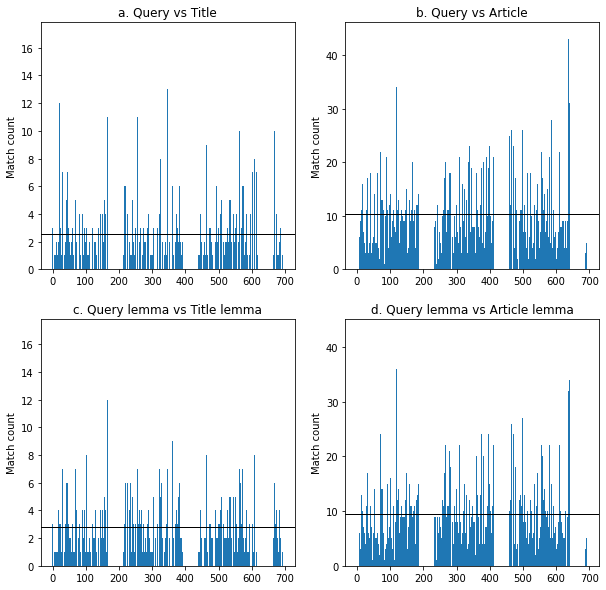

In [ ]:
%matplotlib inline 

from statistics import mean
import matplotlib.pyplot as plt

x = [i for i in range(len(exact_word_title_count_list))]
y = exact_word_title_count_list

plt.figure(figsize=(10,10))
plt.title('Exact word matches between Query , Articles and Article Titles')

plt.subplot(2, 2, 1)
plt.bar(x, exact_word_title_count_list)
plt.axhline(y=mean(exact_word_title_count_list),linewidth=1, color='k')
plt.title("a. Query vs Title")
plt.ylabel('Match count')

plt.subplot(2, 2, 2)
plt.bar(x, exact_word_article_count_list)
plt.axhline(y=mean(exact_word_article_count_list),linewidth=1, color='k')
plt.title("b. Query vs Article")
plt.ylabel('Match count')

plt.subplot(2, 2, 3)
plt.bar(x, exact_lemma_title_count_list)
plt.axhline(y=mean(exact_lemma_title_count_list),linewidth=1, color='k')
plt.title("c. Query lemma vs Title lemma")
plt.ylabel('Match count')


plt.subplot(2,2,4)
plt.bar(x, exact_lemma_article_count_list)
plt.axhline(y=mean(exact_lemma_article_count_list),linewidth=1, color='k')
plt.title("d. Query lemma vs Article lemma")
plt.ylabel('Match count')



plt.show()

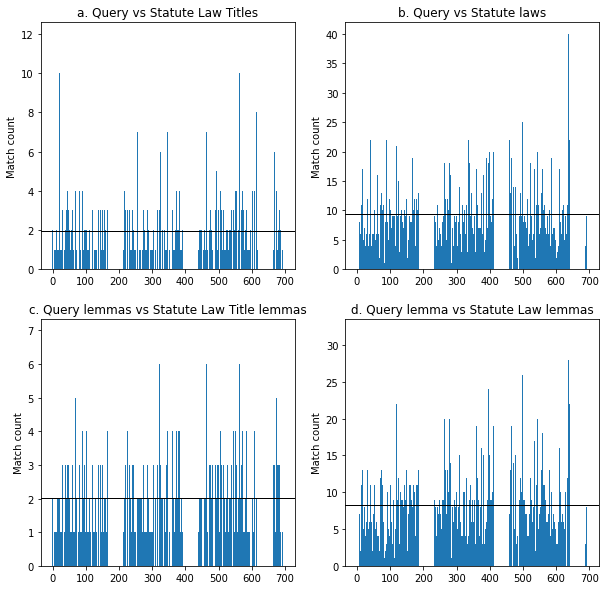

In [ ]:
%matplotlib inline 

from statistics import mean
import matplotlib.pyplot as plt

x = [i for i in range(len(exact_word_title_count_list))]
y = exact_word_title_count_list

plt.figure(figsize=(10,10))
plt.title('Similar word matches between Query , Articles and Article Titles using Query Expansion with WordNet')

plt.subplot(2, 2, 1)
plt.bar(x, similar_word_title_count_list)
plt.axhline(y=mean(similar_word_title_count_list),linewidth=1, color='k')
plt.title("a. Query vs Statute Law Titles")
plt.ylabel('Match count')

plt.subplot(2, 2, 2)
plt.bar(x, similar_word_article_count_list)
plt.axhline(y=mean(similar_word_article_count_list),linewidth=1, color='k')
plt.title("b. Query vs Statute laws")
plt.ylabel('Match count')

plt.subplot(2, 2, 3)
plt.bar(x, similar_lemma_title_count_list)
plt.axhline(y=mean(similar_lemma_title_count_list),linewidth=1, color='k')
plt.title("c. Query lemmas vs Statute Law Title lemmas")
plt.ylabel('Match count')


plt.subplot(2,2,4)
plt.bar(x, similar_lemma_article_count_list)
plt.axhline(y=mean(similar_lemma_article_count_list),linewidth=1, color='k')
plt.title("d. Query lemma vs Statute Law lemmas")
plt.ylabel('Match count')



plt.show()

In [ ]:
similar_word_article_count_dict

{'H18-1-1': 9,
 'H18-1-2': 13,
 'H18-1-3': 2,
 'H18-15-1': 10,
 'H18-15-2': 11,
 'H18-15-3': 9,
 'H18-15-4': 8,
 'H18-15-5': 17,
 'H18-2-1': 2,
 'H18-2-2': 6,
 'H18-2-3': 2,
 'H18-2-4': 1,
 'H18-2-5': 1,
 'H18-20-1': 3,
 'H18-20-2': 8,
 'H18-20-3': 5,
 'H18-21-2': 13,
 'H18-21-3': 6,
 'H18-23-I': 7,
 'H18-23-U': 10,
 'H18-25-E': 20,
 'H18-26-1': 4,
 'H18-26-5': 1,
 'H18-27-U': 4,
 'H18-28-1': 6,
 'H18-28-2': 15,
 'H18-28-3': 21,
 'H18-28-4': 12,
 'H18-29-4': 3,
 'H18-29-5': 13,
 'H18-3-2': 8,
 'H18-3-4': 10,
 'H18-32-5': 4,
 'H18-9-1': 11,
 'H18-9-2': 6,
 'H18-9-3': 10,
 'H19-1-3': 10,
 'H19-10-I': 6,
 'H19-10-O': 8,
 'H19-11-3': 4,
 'H19-11-5': 2,
 'H19-12-1': 22,
 'H19-12-3': 5,
 'H19-12-4': 4,
 'H19-12-5': 8,
 'H19-13-A': 8,
 'H19-13-E': 13,
 'H19-13-I': 7,
 'H19-13-O': 12,
 'H19-13-U': 5,
 'H19-14-1': 12,
 'H19-15-I': 13,
 'H19-16-1': 23,
 'H19-16-2': 10,
 'H19-16-3': 12,
 'H19-16-4': 5,
 'H19-16-5': 7,
 'H19-17-1': 6,
 'H19-17-2': 14,
 'H19-20-I': 9,
 'H19-26-I': 6,
 'H19-26-O': 9

In [ ]:
cleaned_extended_df_relevant.to_csv("cleaned_extended_ground_truth.csv")
cleaned_extended_df_relevant_1 = pd.read_csv("cleaned_extended_ground_truth.csv",index_col=0)
cleaned_extended_df_relevant_1.to_pickle("cleaned_extended_ground_truth.pkl")

In [ ]:
from nltk.util import ngrams

def create_ngrams(sentences_token, n):
    ngrams_list = []
    for sentence in sentences_token:
        if type(sentence) != list:
            grams = list(ngrams(ast.literal_eval(sentence),n))
        else :
            grams = list(ngrams(sentence,n))
        ngrams_list.append(grams)
    return ngrams_list


In [ ]:
def ngram_counter(ngram_list,n):

    total_ngrams_list = []
    for ngram in ngram_list:
        for gram in ngram:
            total_ngrams_list.append(gram)
    ngram_counter = Counter(total_ngrams_list)
    most_used_ngram_counter = ngram_counter.most_common(n)

    return total_ngrams_list,ngram_counter , most_used_ngram_counter

In [ ]:
def combine_ngrams(ngram_list):    
    total_combined_ngram_list = []
    for ngrams in ngram_list:
        combined_ngram_list = []
        for ngram in ngrams :
            combined_ngram_list.append('_'.join(str(v) for v in ngram))
        total_combined_ngram_list.append(combined_ngram_list)
    return total_combined_ngram_list

In [ ]:
article_lemma = cleaned_civil_code['Article_description_lemmas']
query_lemma = cleaned_extended_df_relevant['Query_lemma']
article_bigram_list = create_ngrams(article_lemma, 2)
article_trigram_list = create_ngrams(article_lemma, 3)
query_bigram_list = create_ngrams(query_lemma, 2)
query_trigram_list = create_ngrams(query_lemma, 3)

In [ ]:
total_artilce_bigrams_list , bigram_counter , most_used_bigram_counter = ngram_counter(article_bigram_list,200)
total_artilce_trigrams_list , trigram_counter , most_used_trigram_counter = ngram_counter(article_trigram_list,200)
total_query_bigrams_list , query_bigram_counter , query_most_used_bigram_counter = ngram_counter(query_bigram_list,200)
total_query_trigrams_list , query_trigram_counter , query_most_used_trigram_counter = ngram_counter(query_trigram_list,200)


In [ ]:
most_used_bigram = bigram_counter.most_common(30)
most_used_bigram = dict(most_used_bigram)

In [ ]:
bigrams_series = (pd.Series(most_used_bigram))

In [ ]:
bigrams_series

precede        paragraph      212
provide        however        185
third          party          170
provision      precede        151
may            not            139
not            apply          134
apply          mutatis        104
however        not            102
statutory      lien           102
loss           damage          99
paragraph      1               97
refer          precede         96
precede        article         93
principal      obligor         90
subject        matter          84
manifestation  intention       81
provision      ref_article     81
compensation   loss            80
perform        obligation      80
ref_article    paragraph       76
joint          several         74
pursuant       provision       73
mutatis        mutandi         60
               mutandis        60
set            forth           57
revolving      mortgage        56
several        obligor         56
prescription   period          55
another        person          54
duly          

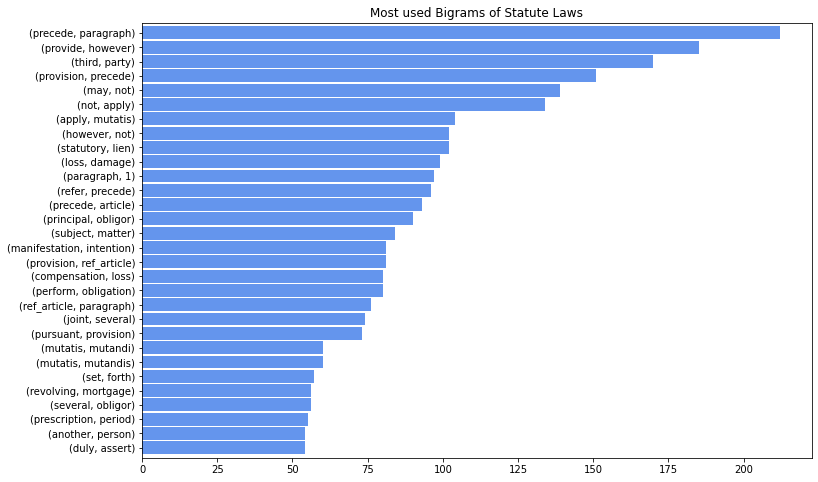

In [ ]:
bigrams_series.sort_values().plot.barh(color='cornflowerblue', width=.9, figsize=(12, 8),title='Most used Bigrams of Statute Laws')

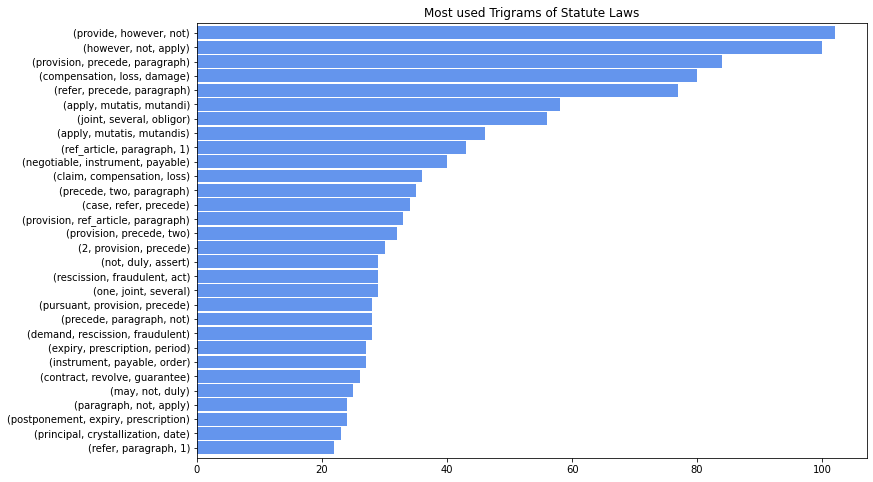

In [ ]:
most_used_trigram = trigram_counter.most_common(30)
most_used_trigram = dict(most_used_trigram)
trigrams_series = (pd.Series(most_used_trigram))
trigrams_series.sort_values().plot.barh(color='cornflowerblue', width=.9, figsize=(12, 8),title='Most used Trigrams of Statute Laws')

In [ ]:
combine_article_bigram_list = combine_ngrams(article_bigram_list)
combine_article_trigram_list = combine_ngrams(article_trigram_list)
combine_query_bigram_list = combine_ngrams(query_bigram_list)
combine_query_trigram_list = combine_ngrams(query_trigram_list)

In [ ]:
ling_ft_civil_code_df.insert(7,'Article_desc_bigrams',combine_article_bigram_list)
ling_ft_civil_code_df.insert(8,'Article_desc_trigrams',combine_article_trigram_list)


In [ ]:
articles_bigram_list = []
articles_trigram_list = []

for i in range(cleaned_df_relevant.shape[0]):

    articles_bigram = []
    articles_trigram = []
    
    relevant_articles = cleaned_df_relevant['Article_numbers'].iloc[i]

    for article in relevant_articles:
        article = re.sub('-','_',article)
        article = article.split()
        
        for i in range(ling_ft_civil_code_df.shape[0]):
            
            number = str(article[0])
            civil_number = ling_ft_civil_code_df['Article_number'].iloc[i].split()[0]

            if number == civil_number:
                articles_bigram.append(ling_ft_civil_code_df['Article_desc_bigrams'].iloc[i])
                articles_trigram.append(ling_ft_civil_code_df['Article_desc_trigrams'].iloc[i])

    articles_bigram_list.append(articles_bigram)
    articles_trigram_list.append(articles_trigram)


In [ ]:
# cleaned_extended_df_relevant = cleaned_extended_df_relevant.drop(['Article_bigrams','Article_trigrams'],axis=1)


In [ ]:
cleaned_extended_df_relevant.insert(16,'Article_bigrams',articles_bigram_list)
cleaned_extended_df_relevant.insert(17,'Article_trigrams',articles_trigram_list)

In [ ]:
cleaned_extended_df_relevant